# 1. Perkenalan

<b><u>Graded Chalengge 6</u></b>

Nama : Muhammad Azhar Khaira

Batch : RMT-033

Data : [Data](P1G6_Set_1_azhar_khaira.csv)

Objectives:

Project kali ini bertujuan untuk membuat model clustering customer segmentation dari data kartu kredit sebuah bank selama 6 bulan terakhir. Model dibuat menggunakan K-Means dengan dilakukan reduksi dimensional menggunakan Principal Component Analysis (PCA).

Conceptual Problems:

1. Apakah yang dimaksud dengan `inertia` pada algoritma K-Means?
2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll)!

# 2. Query SQL

In [796]:
# authentication
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id_acc = "hacktiv8-426908"
client = bigquery.Client(project=project_id_acc)

In [797]:
# query
df_ori = client.query('''
select
  *
from `ftds-hacktiv8-project.phase1_ftds_033_rmt.credit-card-information`
where mod(CUST_ID, 2) = 1
order by CUST_ID
;
''').to_dataframe()

In [798]:
# save dataset named df_ori to csv
df_ori.to_csv("P1G6_Set_1_azhar_khaira.csv", index=False)

# 3. Import Libraries

In [799]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# 4. Data Loading

In [800]:
# read csv
df_ori = pd.read_csv("P1G6_Set_1_azhar_khaira.csv")

In [801]:
# show df_ori 10 data awal
df_ori.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1,1854.033230,1.000000,1013.50,576.00,437.50,1243.093189,0.500000,0.083333,0.333333,0.083333,5,15,2000.0,654.473825,1524.375697,0.000000,12
1,3,129.836526,0.909091,1433.99,743.99,690.00,0.000000,0.909091,0.454545,0.636364,0.000000,0,19,4000.0,1363.134203,141.648860,0.875000,11
2,5,21.580264,0.909091,284.72,0.00,284.72,0.000000,0.666667,0.000000,0.666667,0.000000,0,16,5000.0,344.161416,155.792859,0.800000,12
3,7,16.379412,0.454545,178.15,0.00,178.15,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,229.376368,89.613822,0.181818,12
4,9,686.657879,1.000000,2476.45,1624.50,851.95,253.273353,1.000000,0.750000,1.000000,0.083333,1,35,4000.0,1600.734366,224.265608,0.083333,12
5,11,89.708187,1.000000,1808.60,1808.60,0.00,450.417925,0.916667,0.916667,0.000000,0.166667,3,26,7500.0,1890.186096,139.117341,0.444444,12
6,13,2931.237524,1.000000,150.00,150.00,0.00,1434.135353,0.083333,0.083333,0.000000,0.083333,3,3,3000.0,577.725789,1683.482088,0.000000,12
7,15,5429.372649,1.000000,493.10,0.00,493.10,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,12000.0,1415.589572,1440.327788,0.000000,12
8,17,1381.080028,1.000000,360.00,0.00,360.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,115.649241,13564.391210,0.000000,12
9,19,237.344299,1.000000,1266.03,170.00,1096.03,0.000000,1.000000,0.083333,1.000000,0.000000,0,46,1800.0,729.118157,189.433393,0.500000,12


In [802]:
# show df_ori 10 data akhir
df_ori.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,8931,837.631184,1.000000,0.00,0.00,0.00,867.928181,0.000000,0.000000,0.000000,0.083333,1,0,1000.0,47.144400,5413.385529,0.000000,12
4466,8933,125.793836,1.000000,630.00,0.00,630.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,373.891965,166.265696,0.200000,12
4467,8935,0.000000,0.000000,102.72,0.00,102.72,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1500.0,0.000000,NaN,0.000000,12
4468,8937,108.889031,1.000000,1145.85,445.85,700.00,0.000000,1.000000,0.916667,0.750000,0.000000,0,22,5000.0,874.238956,179.080958,0.833333,12
4469,8939,106.894095,0.909091,62.73,0.00,62.73,0.000000,0.272727,0.000000,0.181818,0.000000,0,3,5000.0,540.130507,146.069474,0.272727,11
4470,8941,10571.411070,1.000000,7739.48,0.00,7739.48,0.000000,1.000000,0.000000,1.000000,0.000000,0,44,8000.0,2688.447014,76406.207520,0.000000,12
4471,8943,2584.317807,1.000000,0.00,0.00,0.00,6036.492283,0.000000,0.000000,0.000000,0.250000,7,0,3000.0,6024.595066,826.013735,0.181818,12
4472,8945,655.712971,1.000000,264.35,202.80,61.55,0.000000,0.333333,0.083333,0.166667,0.000000,0,6,1500.0,180.129661,295.417192,0.000000,12
4473,8947,6593.820644,1.000000,388.66,388.66,0.00,4621.934580,0.583333,0.583333,0.000000,0.416667,7,7,7000.0,1624.583114,2503.402340,0.000000,12
4474,8949,37.307085,0.833333,363.38,0.00,363.38,36.363896,0.833333,0.000000,0.666667,0.166667,1,6,1200.0,284.093261,92.369903,0.000000,6


## 4.1. Column Description

In [803]:
# deskripsi df_ori
df_ori_desc = pd.read_excel("df_ori_desc.xlsx")
df_ori_desc

,column_name,data_type,description
0,CUST_ID,INT64,Identification of Credit Card Holder
1,BALANCE,FLOAT64,Balance amount left in account to make purchase
2,BALANCE_FREQUENCY,FLOAT64,"1 = frequently updated, 0 = not frequently upd..."
3,PURCHASES,FLOAT64,Amount of purchase made from account
4,ONEOFF_PURCHASES,FLOAT64,Max purchase amount done in one-go
5,INSTALLMENTS_PURCHASES,FLOAT64,Amount of purchase done in installment
6,CASH_ADVANCE,FLOAT64,Cash in advance given by user
7,PURCHASES_FREQUENCY,FLOAT64,"1 = frequently purchased, 0 = not frequently p..."
8,ONEOFF_PURCHASES_FREQUENCY,FLOAT64,"1 = frequently purchased, 0 = not frequently p..."
9,PURCHASES_INSTALLMENTS_FREQUENCY,FLOAT64,"1 = frequently done, 0 = not frequently done (..."


<img src="col-desc.png">

In [804]:
# show df_ori info
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

insight:
- dataset terdiri dari 4,475 rows dan 18 columns
- tipe data terdiri dari float64 (14 kolom), int64 (4 kolom)

In [805]:
# df_ori describe
df_ori.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4475.000000,2583.931114,1.000000,2238.000000,4475.000000,6712.000000,8949.00000
BALANCE,4475.0,1563.205717,2072.045789,0.000000,124.432849,871.355430,2047.570799,18495.55855
BALANCE_FREQUENCY,4475.0,0.876933,0.238222,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4475.0,1003.251343,2060.034730,0.000000,39.560000,360.000000,1102.420000,41050.40000
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.000000,0.000000,45.650000,575.220000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.000000,0.000000,88.620000,455.885000,14686.10000
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.000000,0.000000,0.000000,1138.887754,47137.21176
PURCHASES_FREQUENCY,4475.0,0.490579,0.402907,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202301,0.298203,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.363886,0.397603,0.000000,0.000000,0.166667,0.750000,1.00000


insight:
- range BALANCE mulai dari 0 hingga 18495.56
- rata-rata BALANCE_FREQUENCY 0.88 artinya banyak pengguna kartu kredit yang BALANCE-nya sering diperhabarui
- rata-rata PURCHASES 1003.25 dengan deviasi standar yang tinggi (2060.03), ini menunjukkan adanya perbedaan yang besar dalam jumlah pembelian para pengguna kartu kredit
- perbandingan rata-rata ONEOFF_PURCHASES (596.37) dan INSTALLMENTS_PURCHASES (407.11) menunjukkan kemungkinan sebagian besar pembelian dilakukan dalam bentuk pembelian satu kali
- rata-rata CASH_ADVANCE_FREQUENCY adalah 0.14, ini menunjukkan bahwa sebagian besar pengguna kartu kredit tidak sering mengambil uang muka
- perbandingan rata-rata ONEOFF_PURCHASES_FREQUENCY (0.20) dan PURCHASES_INSTALLMENTS_FREQUENCY (0.36) menunjukan kemungkinan sebagian besar pengguna kartu kredit lebih cenderung menggunakan pembayaran dengan skema cicilan
- Rata-rata PRC_FULL_PAYMENT 0.15, menunjukkan bahwa hanya sebagian kecil yang membayar penuh tagihan

## 4.2. Data Loading Conclusion

Dataset tersebut berisi informasi mengenai perilaku finansial dan kredit pelanggan, termasuk saldo akun, frekuensi transaksi, batas kredit, serta data tentang pembelian dan pembayaran. Informasi ini mencakup detail tentang berapa banyak pelanggan membelanjakan, seberapa sering melakukan transaksi, seberapa besar uang muka yang diambil dan bagaimana pemegang kartu kredit mengelola pembayaran serta saldo kreditnya.

# 5. Exploratory Data Analysis (EDA)

In [806]:
# copy df_ori to dataframe named df
df = df_ori.copy()

## 5.1. Cek duplikat

In [807]:
# cek duplikat
df.duplicated().sum()

0

insight:
- tidak ada data duplikat

## 5.2. Cek missing value

In [808]:
# cek missing value
missing_value = df.isnull().sum()
missing_value = missing_value[missing_value > 0]
missing_value

MINIMUM_PAYMENTS    155
dtype: int64

insight:
- terdapat missing value pada MINIMUM_PAYMENTS sebanyak 155 rows

## 5.3. BALANCE

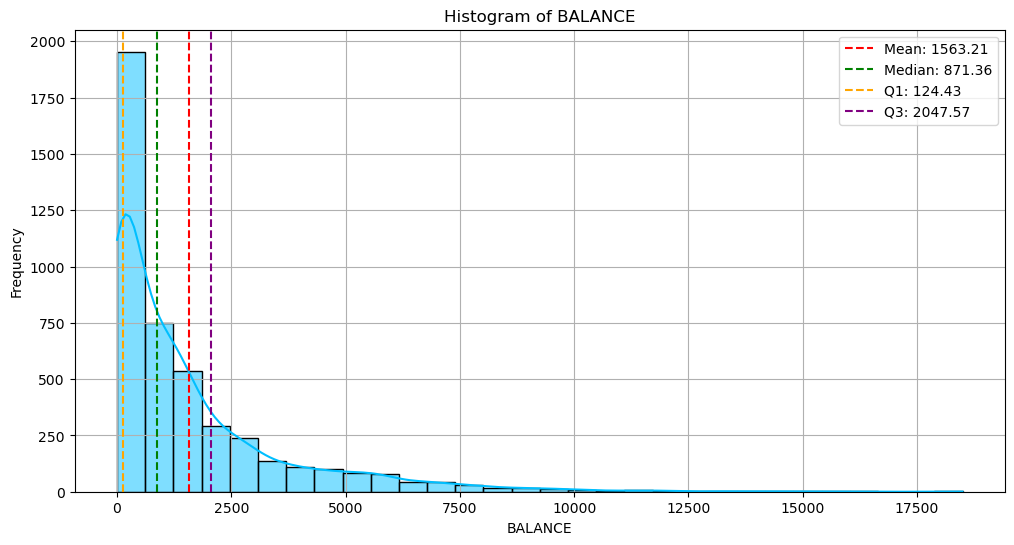

In [809]:
# statistic
mean_balance = df["BALANCE"].mean()
median_balance = df["BALANCE"].median()
q1_balance = df["BALANCE"].quantile(0.25)
q3_balance = df["BALANCE"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["BALANCE"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_balance, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_balance:.2f}")
plt.axvline(median_balance, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_balance:.2f}")
plt.axvline(q1_balance, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_balance:.2f}")
plt.axvline(q3_balance, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_balance:.2f}")

# label
plt.title("Histogram of BALANCE")
plt.xlabel("BALANCE")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- banyak pemegang kartu kredit yang memiliki sisa saldo untuk sedikit mulai dari 0 hingga sekitar kurang dari 2,500

## 5.4. BALANCE_FREQUENCY

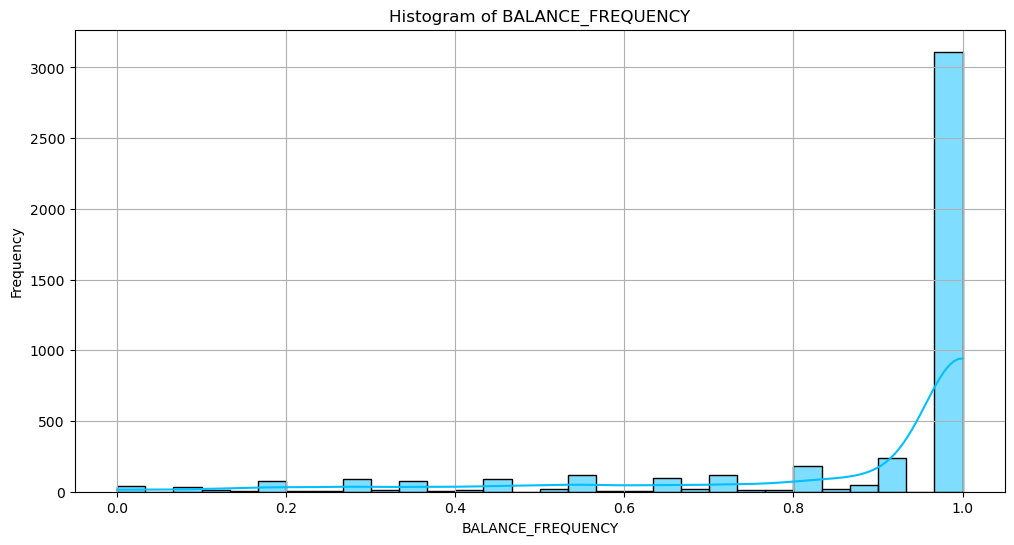

In [810]:
# plot
plt.figure(figsize=(12,6))
sns.histplot(df["BALANCE_FREQUENCY"], bins=30, kde=True, color="deepskyblue")

# label
plt.title("Histogram of BALANCE_FREQUENCY")
plt.xlabel("BALANCE_FREQUENCY")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- 1 = frequently updated, 0 = not frequently updated
- banyak pemegang kartu kredit yang saldonya sering diperbaharui

## 5.5. PURCHASES

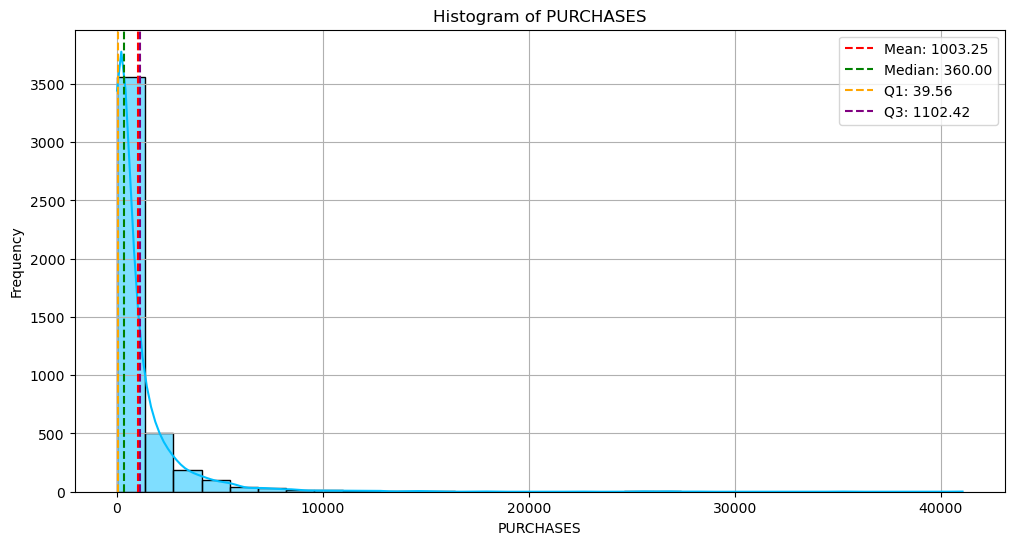

In [811]:
# statistic
mean_purchases = df["PURCHASES"].mean()
median_purchases = df["PURCHASES"].median()
q1_purchases = df["PURCHASES"].quantile(0.25)
q3_purchases = df["PURCHASES"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["PURCHASES"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_purchases, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_purchases:.2f}")
plt.axvline(median_purchases, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_purchases:.2f}")
plt.axvline(q1_purchases, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_purchases:.2f}")
plt.axvline(q3_purchases, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_purchases:.2f}")

# label
plt.title("Histogram of PURCHASES")
plt.xlabel("PURCHASES")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- pembelian yang dilakukan pemegang kartu kredit banyak pada nominal kecil mulai dari 0 hingga kurang dari sekitar 50,000

## 5.6. ONEOFF_PURCHASES

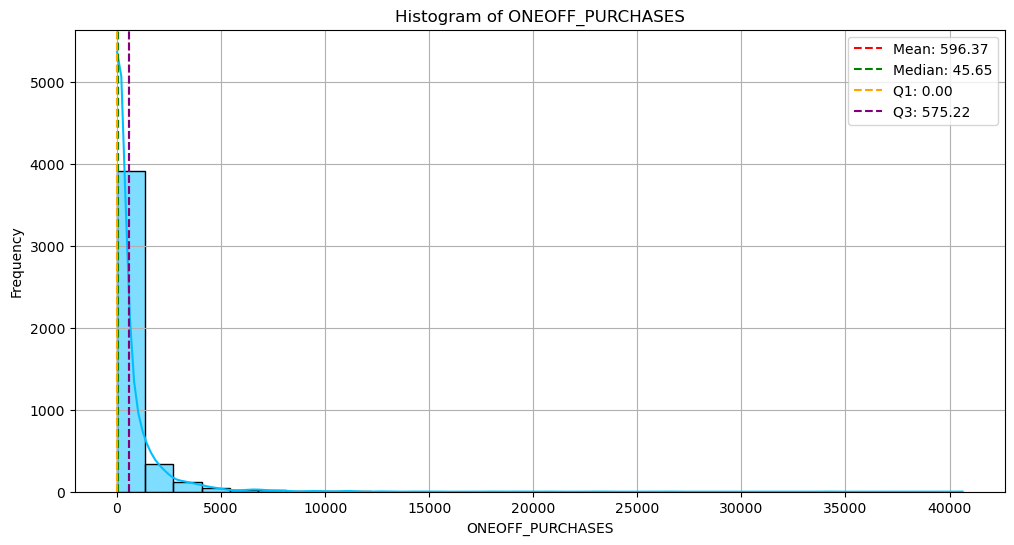

In [812]:
# statistic
mean_oneoff_purchases = df["ONEOFF_PURCHASES"].mean()
median_oneoff_purchases = df["ONEOFF_PURCHASES"].median()
q1_oneoff_purchases = df["ONEOFF_PURCHASES"].quantile(0.25)
q3_oneoff_purchases = df["ONEOFF_PURCHASES"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["ONEOFF_PURCHASES"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_oneoff_purchases, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_oneoff_purchases:.2f}")
plt.axvline(median_oneoff_purchases, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_oneoff_purchases:.2f}")
plt.axvline(q1_oneoff_purchases, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_oneoff_purchases:.2f}")
plt.axvline(q3_oneoff_purchases, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_oneoff_purchases:.2f}")

# label
plt.title("Histogram of ONEOFF_PURCHASES")
plt.xlabel("ONEOFF_PURCHASES")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- jumlah maksimum satu kali transaksi banyak pada nominal yang kecil mulai dari 0 hingga kurang dari sekitar 2,500

## 5.7. INSTALLMENTS_PURCHASES

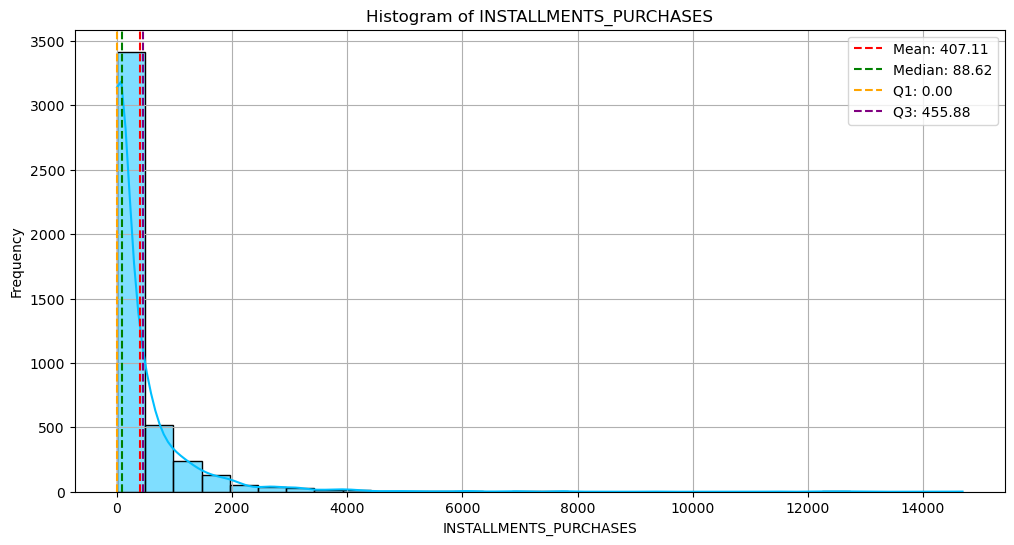

In [813]:
# statistic
mean_installments_purchases = df["INSTALLMENTS_PURCHASES"].mean()
median_installments_purchases = df["INSTALLMENTS_PURCHASES"].median()
q1_installments_purchases = df["INSTALLMENTS_PURCHASES"].quantile(0.25)
q3_installments_purchases = df["INSTALLMENTS_PURCHASES"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["INSTALLMENTS_PURCHASES"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_installments_purchases, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_installments_purchases:.2f}")
plt.axvline(median_installments_purchases, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_installments_purchases:.2f}")
plt.axvline(q1_installments_purchases, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_installments_purchases:.2f}")
plt.axvline(q3_installments_purchases, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_installments_purchases:.2f}")

# label
plt.title("Histogram of INSTALLMENTS_PURCHASES")
plt.xlabel("INSTALLMENTS_PURCHASES")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- pembelian dengan cicilan para pemegang kartu kredit banyak pada nominal kecil mulai dari 0 hingga sekitar 1,000

## 5.8. CASH_ADVANCE

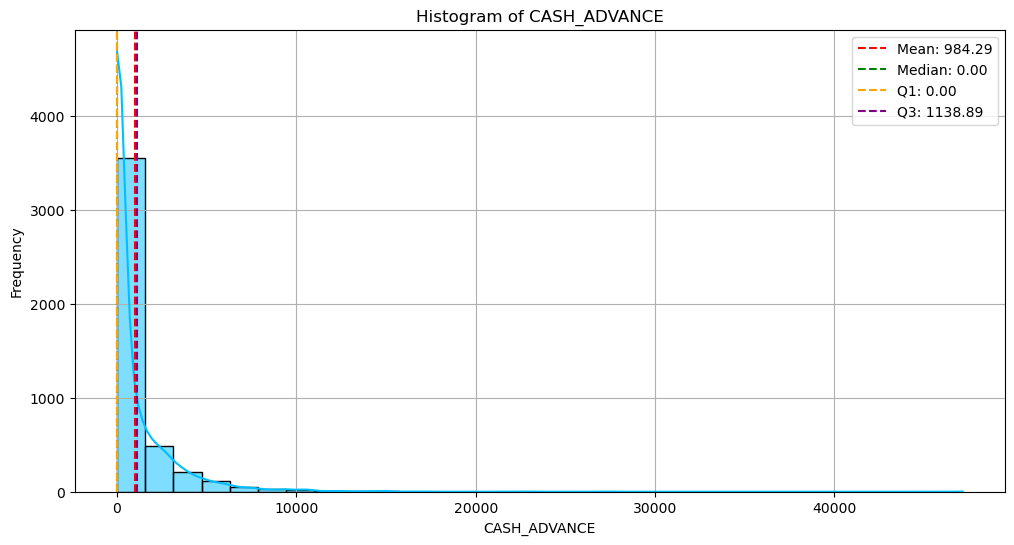

In [814]:
# statistic
mean_cash_advance = df["CASH_ADVANCE"].mean()
median_cash_advance = df["CASH_ADVANCE"].median()
q1_cash_advance = df["CASH_ADVANCE"].quantile(0.25)
q3_cash_advance = df["CASH_ADVANCE"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["CASH_ADVANCE"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_cash_advance, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_cash_advance:.2f}")
plt.axvline(median_cash_advance, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_cash_advance:.2f}")
plt.axvline(q1_cash_advance, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_cash_advance:.2f}")
plt.axvline(q3_cash_advance, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_cash_advance:.2f}")

# label
plt.title("Histogram of CASH_ADVANCE")
plt.xlabel("CASH_ADVANCE")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

## 5.9. PURCHASES_FREQUENCY

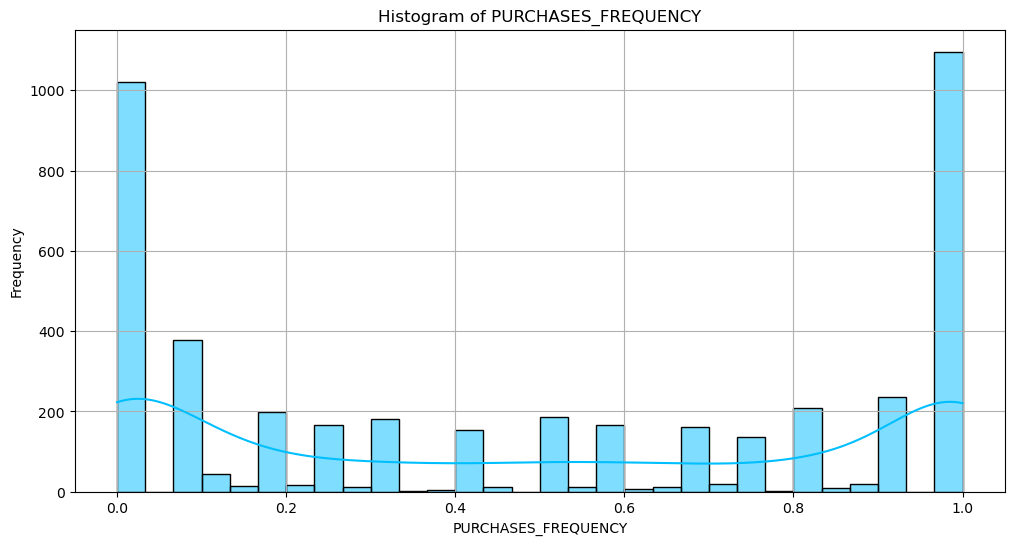

In [815]:
# plot
plt.figure(figsize=(12,6))
sns.histplot(df["PURCHASES_FREQUENCY"], bins=30, kde=True, color="deepskyblue")

# label
plt.title("Histogram of PURCHASES_FREQUENCY")
plt.xlabel("PURCHASES_FREQUENCY")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- 1 = frequently purchased, 0 = not frequently purchased
- proporsi pemegang kartu yang sering melakukan pembelian dan jarang melakukan pembelian kurang lebih sama

## 5.10. ONEOFF_PURCHASES_FREQUENCY

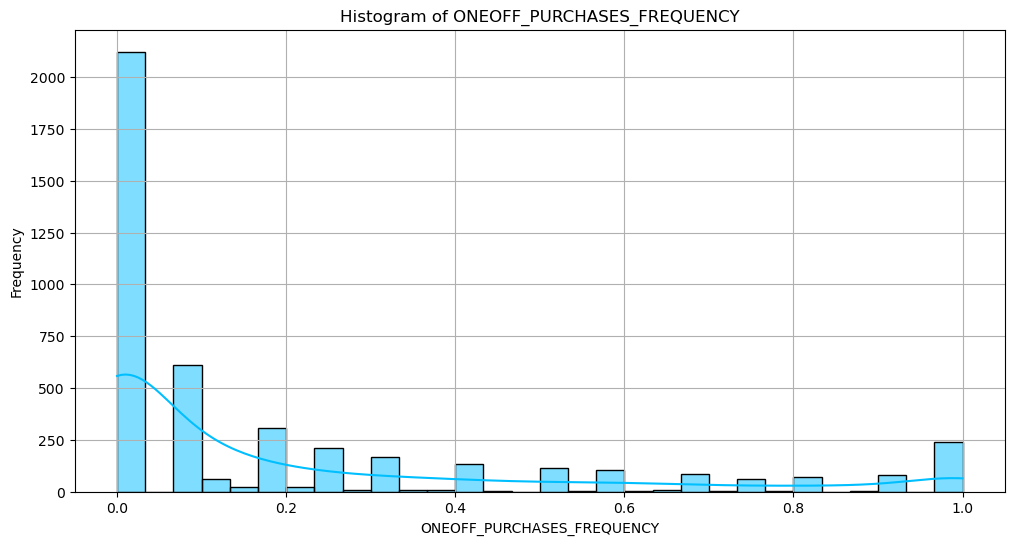

In [816]:
# plot
plt.figure(figsize=(12,6))
sns.histplot(df["ONEOFF_PURCHASES_FREQUENCY"], bins=30, kde=True, color="deepskyblue")

# label
plt.title("Histogram of ONEOFF_PURCHASES_FREQUENCY")
plt.xlabel("ONEOFF_PURCHASES_FREQUENCY")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- 1 = frequently purchased, 0 = not frequently purchased
- pemegang kartu kredit banyak yang jarang melakukan transaksi satu kali pembelian

## 5.11. PURCHASES_INSTALLMENTS_FREQUENCY

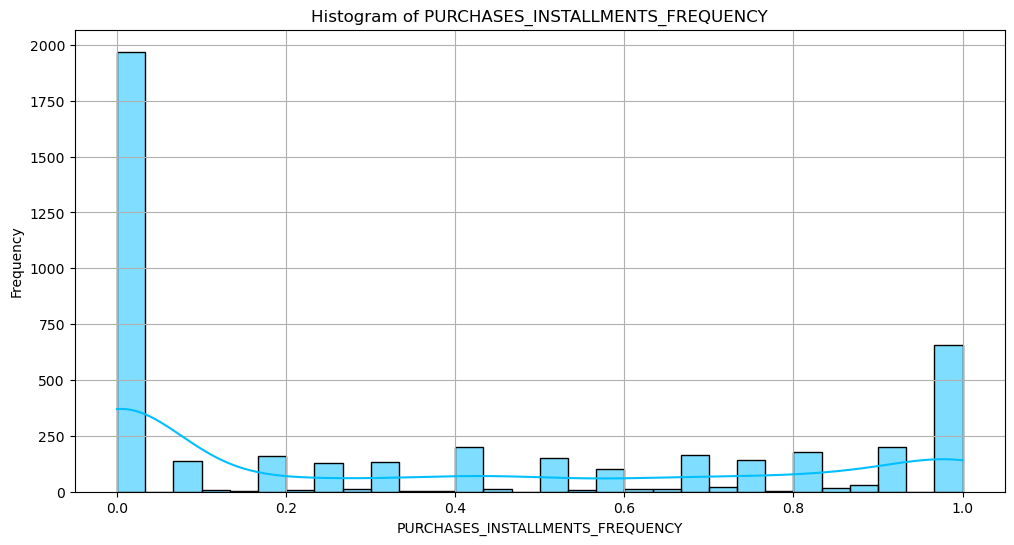

In [817]:
# plot
plt.figure(figsize=(12,6))
sns.histplot(df["PURCHASES_INSTALLMENTS_FREQUENCY"], bins=30, kde=True, color="deepskyblue")

# label
plt.title("Histogram of PURCHASES_INSTALLMENTS_FREQUENCY")
plt.xlabel("PURCHASES_INSTALLMENTS_FREQUENCY")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- 1 = frequently done, 0 = not frequently done
- banyak pemegang kartu kredit yang tidak melakukan pembelian dengan cicilan

## 5.12. CASH_ADVANCE_FREQUENCY

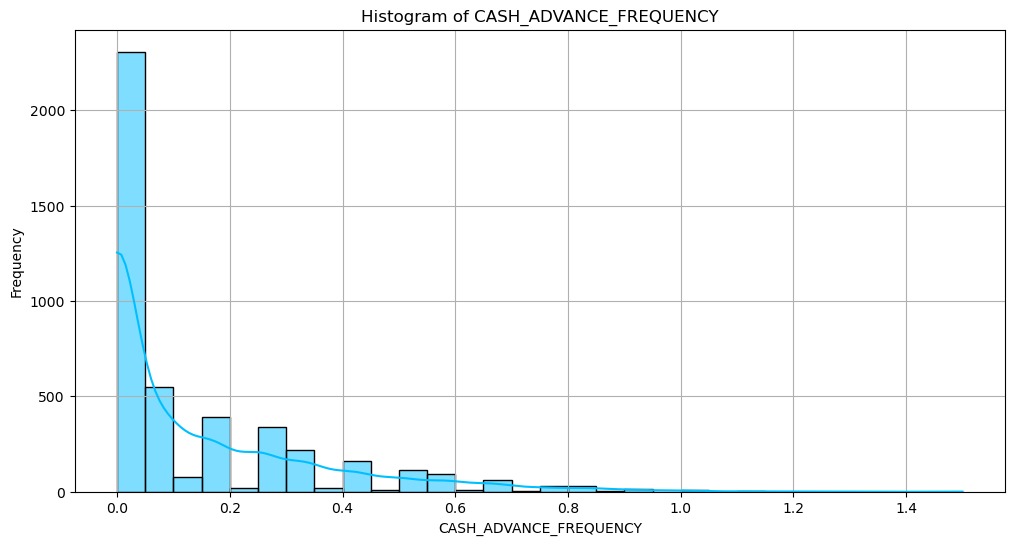

In [818]:
# plot
plt.figure(figsize=(12,6))
sns.histplot(df["CASH_ADVANCE_FREQUENCY"], bins=30, kde=True, color="deepskyblue")

# label
plt.title("Histogram of CASH_ADVANCE_FREQUENCY")
plt.xlabel("CASH_ADVANCE_FREQUENCY")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- banyak pemegang kartu yang jarang melakukan pembayaran uang muka

## 5.13. CASH_ADVANCE_TRX

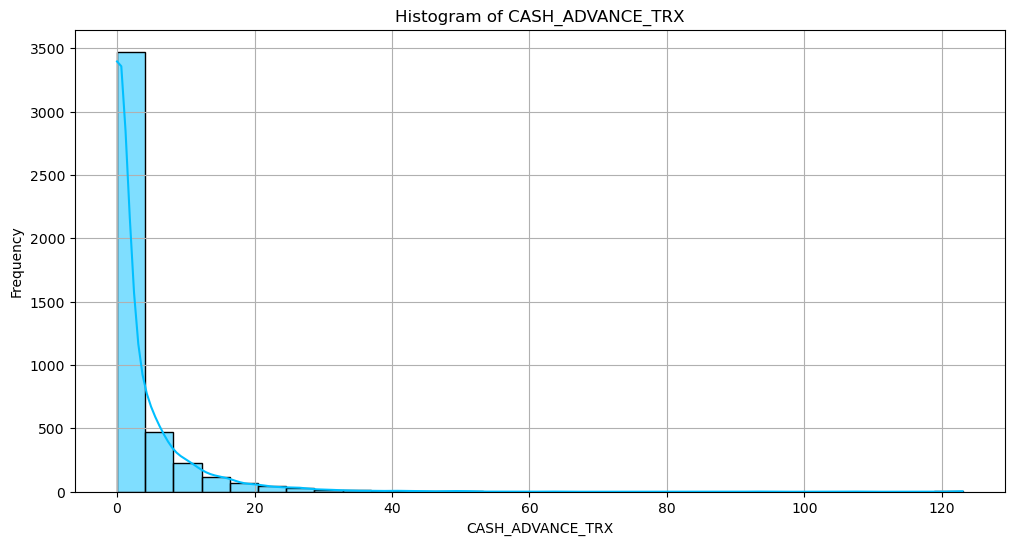

In [819]:
# plot
plt.figure(figsize=(12,6))
sns.histplot(df["CASH_ADVANCE_TRX"], bins=30, kde=True, color="deepskyblue")

# label
plt.title("Histogram of CASH_ADVANCE_TRX")
plt.xlabel("CASH_ADVANCE_TRX")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- jumlah pemnbayaran di muka banyak pada frekuensi yang sedikit mulai dari 0 hingga kurang dari 10 kali

## 5.14. PURCHASES_TRX

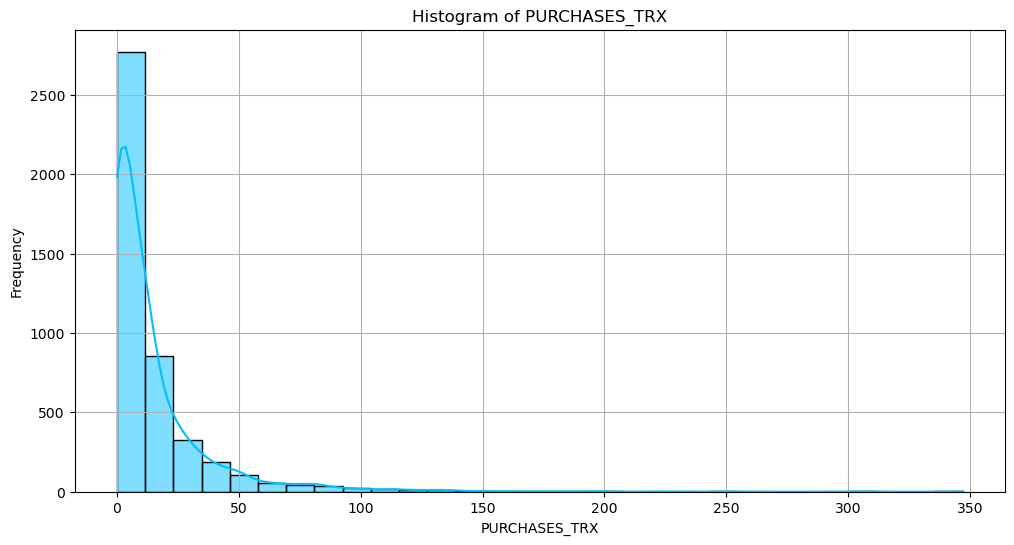

In [820]:
# plot
plt.figure(figsize=(12,6))
sns.histplot(df["PURCHASES_TRX"], bins=30, kde=True, color="deepskyblue")

# label
plt.title("Histogram of PURCHASES_TRX")
plt.xlabel("PURCHASES_TRX")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- para pemegang karu masih jarang melakukan transaksi menggunakan kartu kredit

## 5.15. CREDIT_LIMIT

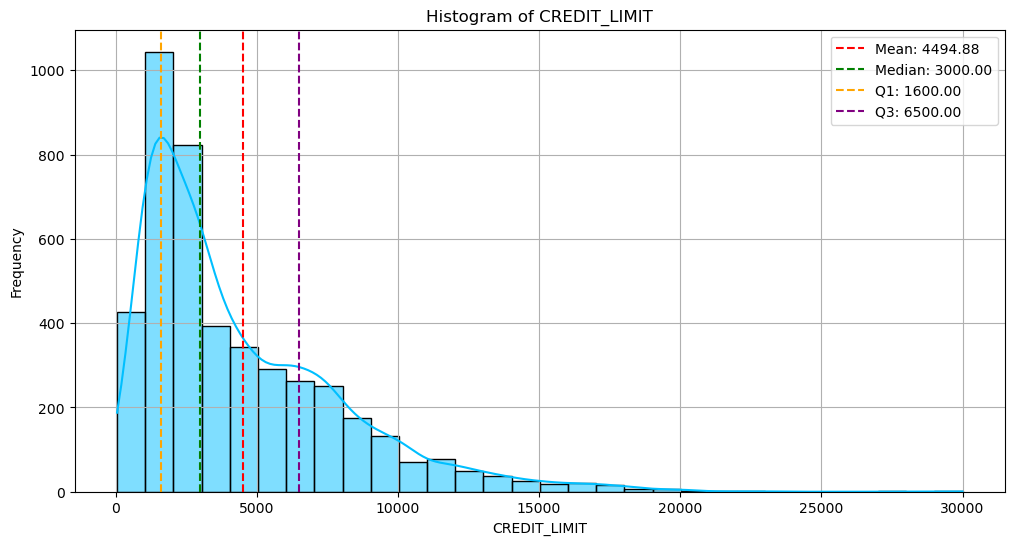

In [821]:
# statistic
mean_credit_limit = df["CREDIT_LIMIT"].mean()
median_credit_limit = df["CREDIT_LIMIT"].median()
q1_credit_limit = df["CREDIT_LIMIT"].quantile(0.25)
q3_credit_limit = df["CREDIT_LIMIT"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["CREDIT_LIMIT"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_credit_limit, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_credit_limit:.2f}")
plt.axvline(median_credit_limit, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_credit_limit:.2f}")
plt.axvline(q1_credit_limit, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_credit_limit:.2f}")
plt.axvline(q3_credit_limit, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_credit_limit:.2f}")

# label
plt.title("Histogram of CREDIT_LIMIT")
plt.xlabel("CREDIT_LIMIT")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- limit pemegang kartu kredit banyak pada nominal kecil mulai dari 0 hingga 5,000

## 5.16. PAYMENTS

In [822]:
# PAYMENTS describe
df["PAYMENTS"].describe().T

count     4475.000000
mean      1740.075430
std       2827.633858
min          0.000000
25%        376.913051
50%        877.494612
75%       1911.596530
max      50721.483360
Name: PAYMENTS, dtype: float64

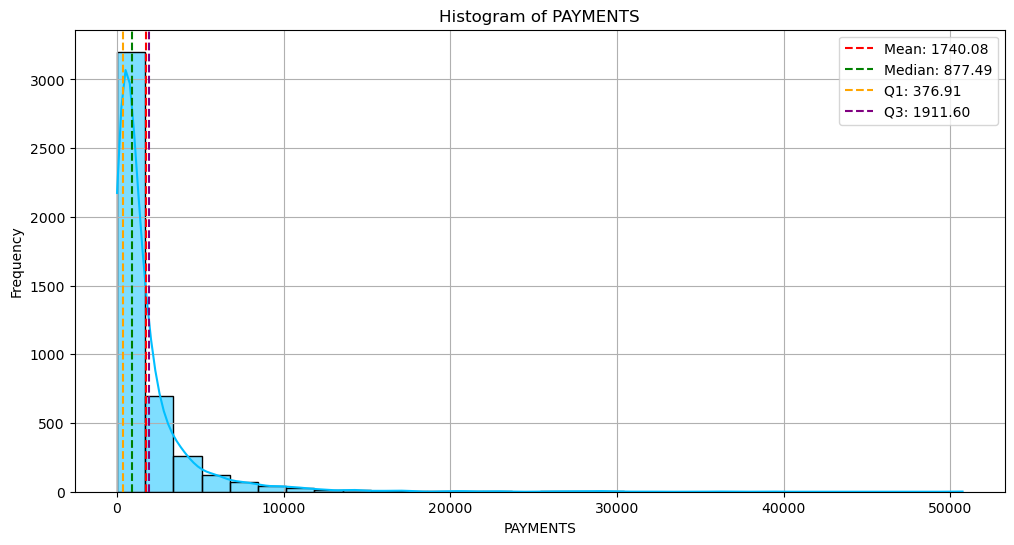

In [823]:
# statistic
mean_payments = df["PAYMENTS"].mean()
median_payments = df["PAYMENTS"].median()
q1_payments = df["PAYMENTS"].quantile(0.25)
q3_payments = df["PAYMENTS"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["PAYMENTS"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_payments, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_payments:.2f}")
plt.axvline(median_payments, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_payments:.2f}")
plt.axvline(q1_payments, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_payments:.2f}")
plt.axvline(q3_payments, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_payments:.2f}")

# label
plt.title("Histogram of PAYMENTS")
plt.xlabel("PAYMENTS")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- jumlah pembayaran kartu kredit masih berjumlah sedikit mulai dari 0 hingga sekitar 3,000

## 5.17. MINIMUM_PAYMENTS

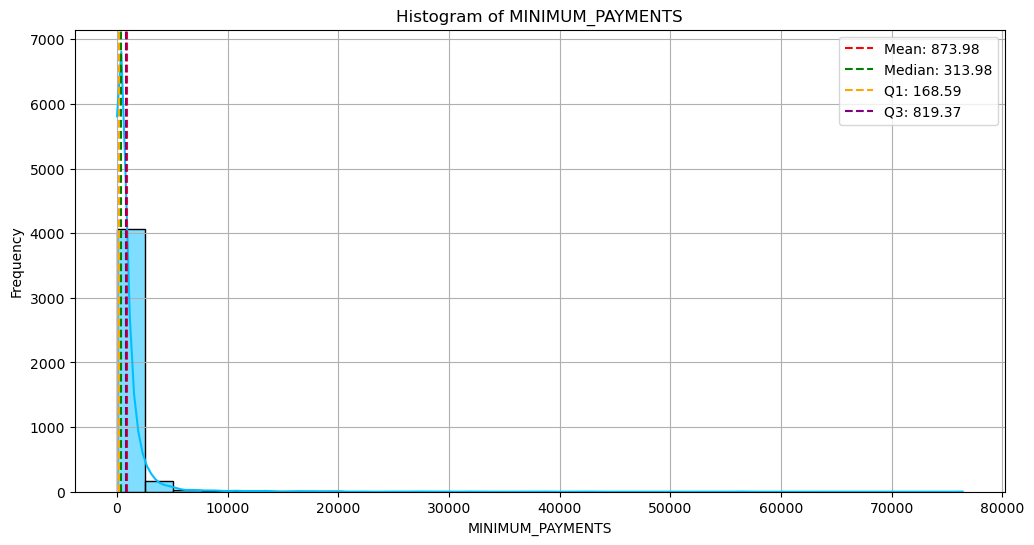

In [824]:
# statistic
mean_min_payments = df["MINIMUM_PAYMENTS"].mean()
median_min_payments = df["MINIMUM_PAYMENTS"].median()
q1_min_payments = df["MINIMUM_PAYMENTS"].quantile(0.25)
q3_min_payments = df["MINIMUM_PAYMENTS"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["MINIMUM_PAYMENTS"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_min_payments, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_min_payments:.2f}")
plt.axvline(median_min_payments, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_min_payments:.2f}")
plt.axvline(q1_min_payments, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_min_payments:.2f}")
plt.axvline(q3_min_payments, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_min_payments:.2f}")

# label
plt.title("Histogram of MINIMUM_PAYMENTS")
plt.xlabel("MINIMUM_PAYMENTS")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- pembayaran minimum pemegang kartu kredit banyak pada nominal kecil mulai dari 0 hingga kurang dari 5,000

## 5.18. PRC_FULL_PAYMENT

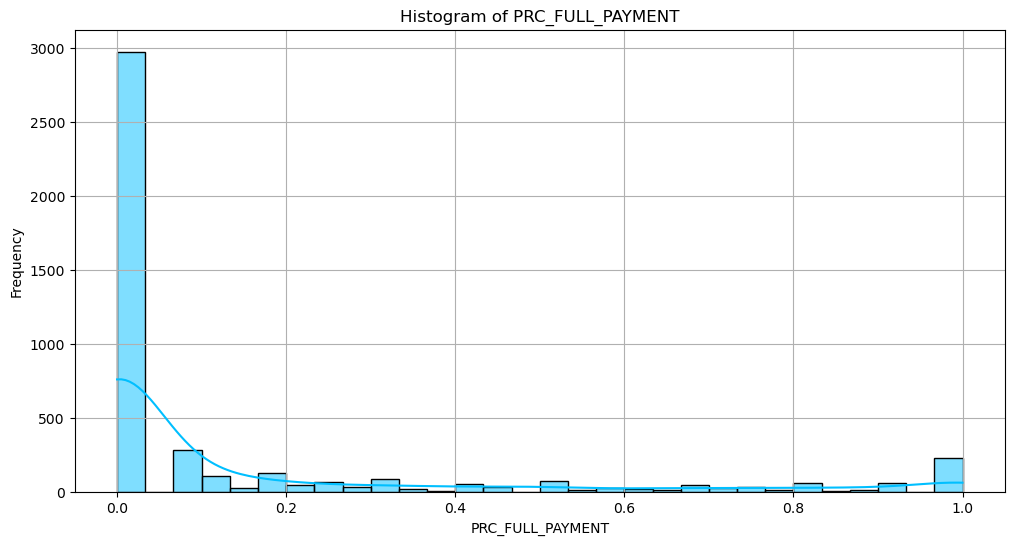

In [825]:
# plot
plt.figure(figsize=(12,6))
sns.histplot(df["PRC_FULL_PAYMENT"], bins=30, kde=True, color="deepskyblue")

# label
plt.title("Histogram of PRC_FULL_PAYMENT")
plt.xlabel("PRC_FULL_PAYMENT")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- banyak pemegang kartu yang tidak melakukan pembayaran penuh

## 5.19. TENURE

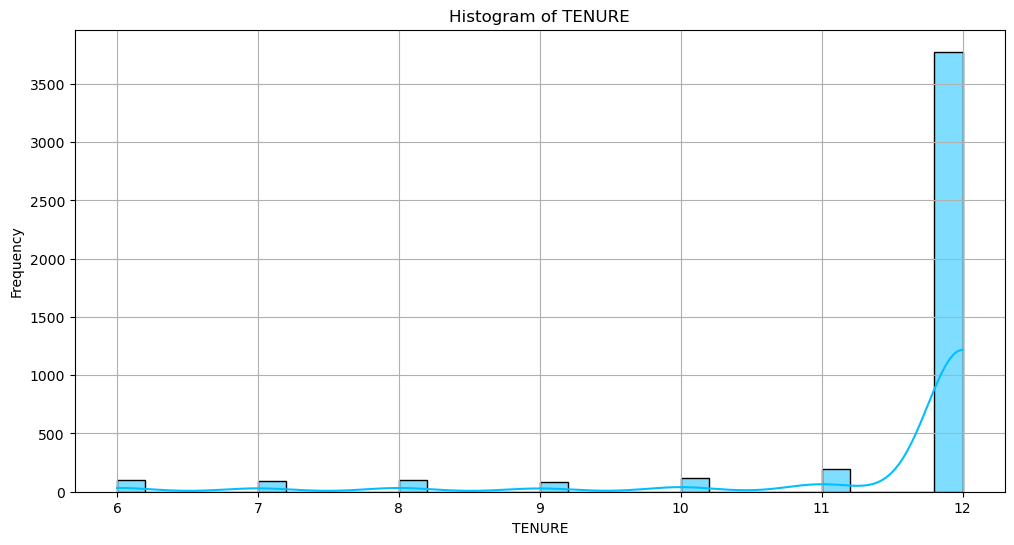

In [826]:
# plot
plt.figure(figsize=(12,6))
sns.histplot(df["TENURE"], bins=30, kde=True, color="deepskyblue")

# label
plt.title("Histogram of TENURE")
plt.xlabel("TENURE")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- banyak pemegang kartu yang memiliki masa berlaku 12 bulan

## 5.20. Skewness

In [827]:
# init
columns = []
skewness_values = []
skew_desc = []

# loop skewness
for col in df.columns:
    skew = df[col].skew()
    columns.append(col)
    skewness_values.append(skew)
    if skew >= 0.5 or skew <= -0.5:
        skew_desc.append("skew")
    else:
        skew_desc.append("normal")

skewness_df = pd.DataFrame({"Column": columns,
                            "Skewness": skewness_values,
                            "Skew Desc": skew_desc})
# show skewness_df
skewness_df

,Column,Skewness,Skew Desc
0,CUST_ID,0.000000,normal
1,BALANCE,2.329009,skew
2,BALANCE_FREQUENCY,-2.026530,skew
3,PURCHASES,7.071706,skew
4,ONEOFF_PURCHASES,9.951057,skew
5,INSTALLMENTS_PURCHASES,6.330630,skew
6,CASH_ADVANCE,5.638109,skew
7,PURCHASES_FREQUENCY,0.058755,normal
8,ONEOFF_PURCHASES_FREQUENCY,1.548319,skew
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.508296,skew


## 5.21. EDA Conclusion

- Dataset berisi informasi tentang penggunaan kartu kredit dari pemegang kartu. Setiap baris dalam dataset mewakili satu pemegang kartu kredit dan kolom-kolom berisi informasi yang berbeda terkait aktivitas dan atribut kartu kredit.
- Dataset ini bisa memberikan wawasan tentang perilaku pemegang kartu kredit, termasuk seberapa sering memperbarui saldo, seberapa sering melakukan pembelian, berapa banyak menghabiskan dalam pembelian satu kali atau cicilan, serta penggunaan uang muka tunai.
- Berdasarkan informasi tersebut akan dilakukan clustering untuk mengidentifikasi kelompok-kelompok pemegang kartu kredit berdasarkan perilakunya dalam menggunakan kartu kredit.

# 6. Feature Engineering

In [828]:
# copy df to dataframe named df_model
df_model = df.copy()

## 6.1. Feature Selection

In [829]:
# drop CUST_ID dan TENURE
df_model = df_model.drop(columns=["CUST_ID", "TENURE"])

In [830]:
# show df_model
df_model

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,1854.033230,1.000000,1013.50,576.00,437.50,1243.093189,0.500000,0.083333,0.333333,0.083333,5,15,2000.0,654.473825,1524.375697,0.000000
1,129.836526,0.909091,1433.99,743.99,690.00,0.000000,0.909091,0.454545,0.636364,0.000000,0,19,4000.0,1363.134203,141.648860,0.875000
2,21.580264,0.909091,284.72,0.00,284.72,0.000000,0.666667,0.000000,0.666667,0.000000,0,16,5000.0,344.161416,155.792859,0.800000
3,16.379412,0.454545,178.15,0.00,178.15,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,229.376368,89.613822,0.181818
4,686.657879,1.000000,2476.45,1624.50,851.95,253.273353,1.000000,0.750000,1.000000,0.083333,1,35,4000.0,1600.734366,224.265608,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,10571.411070,1.000000,7739.48,0.00,7739.48,0.000000,1.000000,0.000000,1.000000,0.000000,0,44,8000.0,2688.447014,76406.207520,0.000000
4471,2584.317807,1.000000,0.00,0.00,0.00,6036.492283,0.000000,0.000000,0.000000,0.250000,7,0,3000.0,6024.595066,826.013735,0.181818
4472,655.712971,1.000000,264.35,202.80,61.55,0.000000,0.333333,0.083333,0.166667,0.000000,0,6,1500.0,180.129661,295.417192,0.000000
4473,6593.820644,1.000000,388.66,388.66,0.00,4621.934580,0.583333,0.583333,0.000000,0.416667,7,7,7000.0,1624.583114,2503.402340,0.000000


## 6.2. Handling Missing Value

In [831]:
# cek missing_value
missing_value

MINIMUM_PAYMENTS    155
dtype: int64

insight:
- MINIMUM_PAYMENTS terdapat missing values sebanyak 155 rows

In [832]:
# cek row data missing value
missing_value_rows = df_model[df_model.isnull().any(axis=1)]
missing_value_rows.head(30)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
33,0.000000,0.000000,19.25,0.00,19.25,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,4000.0,0.000000,NaN,0.0
62,71.310815,0.090909,0.00,0.00,0.00,1849.578078,0.000000,0.000000,0.000000,0.083333,1,0,6000.0,0.000000,NaN,0.0
110,0.000000,0.000000,140.04,0.00,140.04,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,129.905883,NaN,0.0
117,269.816561,0.636364,1965.95,1965.95,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,5500.0,0.000000,NaN,0.0
182,0.859447,0.454545,23.00,23.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,0.000000,NaN,0.0
190,14.891634,0.222222,0.00,0.00,0.00,116.193463,0.000000,0.000000,0.000000,0.111111,1,0,3000.0,0.000000,NaN,0.0
226,2677.842539,1.000000,149.80,149.80,0.00,2838.173232,0.142857,0.142857,0.000000,0.142857,13,1,3000.0,0.000000,NaN,0.0
261,2676.253141,0.909091,0.00,0.00,0.00,2832.570661,0.000000,0.000000,0.000000,0.083333,2,0,3000.0,0.000000,NaN,0.0
282,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.0
292,0.000000,0.000000,52.50,0.00,52.50,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,3000.0,57.506797,NaN,0.0


insight:
- berdasarkan pengamatan pola data yang memiliki missing value. missing value pada MINIMUM_PAYMENTS termasuk pada missing not at random dimana missing value tersebut tidak karena berkaitan dengan variabel lain
- akan dilakukan drop

In [833]:
# drop missing value
df_model = df_model.dropna()

In [834]:
# cek hasil drop
df_model.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

## 6.3. Handling Outliers

In [835]:
# init col to check
columns_to_check = df_model.columns

for col in columns_to_check:
    print(col)

    # skewness
    skew_col = df_model[col].skew()
    print(f"skewness {col}       = {skew_col}")

    # q1 q3 iqr
    q1_col = df_model[col].quantile(0.25)
    q3_col = df_model[col].quantile(0.75)
    iqr_col = q3_col - q1_col

    # lower upper boundary
    ub_col = q3_col + 1.5 * iqr_col
    lb_col = q1_col - 1.5 * iqr_col

    print(f"upper boundary {col} = {ub_col}")
    print(f"lower boundary {col} = {lb_col}")

    # outliers
    outlier_col = df_model[col][(df_model[col] < lb_col) | (df_model[col] > ub_col)]

    if len(outlier_col) > 0:
        print(f"terdapat outliers sebanyak {len(outlier_col)} row")
        print(f"dengan persentase {(len(outlier_col) / len(df_model[col]) * 100):.2f}%")

        # min max outliers
        min_outlier_col = outlier_col.min()
        max_outlier_col = outlier_col.max()
        print(f"min outlier_{col} = {min_outlier_col}")
        print(f"max outlier_{col} = {max_outlier_col}")
    else:
        print(f"tidak ada outliers untuk kolom {col}")

    print("")


BALANCE
skewness BALANCE       = 2.3060560083334405
upper boundary BALANCE = 5024.810394124999
lower boundary BALANCE = -2783.4667128749998
terdapat outliers sebanyak 347 row
dengan persentase 8.03%
min outlier_BALANCE = 5030.927831
max outlier_BALANCE = 18495.55855

BALANCE_FREQUENCY
skewness BALANCE_FREQUENCY       = -2.085655942874465
upper boundary BALANCE_FREQUENCY = 1.1363635
lower boundary BALANCE_FREQUENCY = 0.7727275
terdapat outliers sebanyak 752 row
dengan persentase 17.41%
min outlier_BALANCE_FREQUENCY = 0.0
max outlier_BALANCE_FREQUENCY = 0.75

PURCHASES
skewness PURCHASES       = 6.982698043897624
upper boundary PURCHASES = 2783.9100000000003
lower boundary PURCHASES = -1601.4500000000003
terdapat outliers sebanyak 400 row
dengan persentase 9.26%
min outlier_PURCHASES = 2788.81
max outlier_PURCHASES = 41050.4

ONEOFF_PURCHASES
skewness ONEOFF_PURCHASES       = 9.827307004944029
upper boundary ONEOFF_PURCHASES = 1485.68125
lower boundary ONEOFF_PURCHASES = -891.40875
terda

insight:
- outliers tidak dilakukan handling

In [836]:
# # code kalau handling di-capping pake Winsorizer
# from feature_engine.outliers import Winsorizer
# windsoriser = Winsorizer(capping_method="iqr",
#                           tail="both",
#                           fold=1.5,
#                           variables=df_model.columns.to_list())

# windsoriser.fit(df_model)

# df_model = windsoriser.transform(df_model)

## 6.4. Scaling

In [837]:
# scaling
scaler = MinMaxScaler()
df_model_scaled = scaler.fit_transform(df_model)

## 6.5. Dimensionality Reduction

In [838]:
# pca fit
pca = PCA()
pca.fit(df_model_scaled)

PCA()

In [839]:
# components length
len_components = len(pca.explained_variance_ratio_)
len_components

16

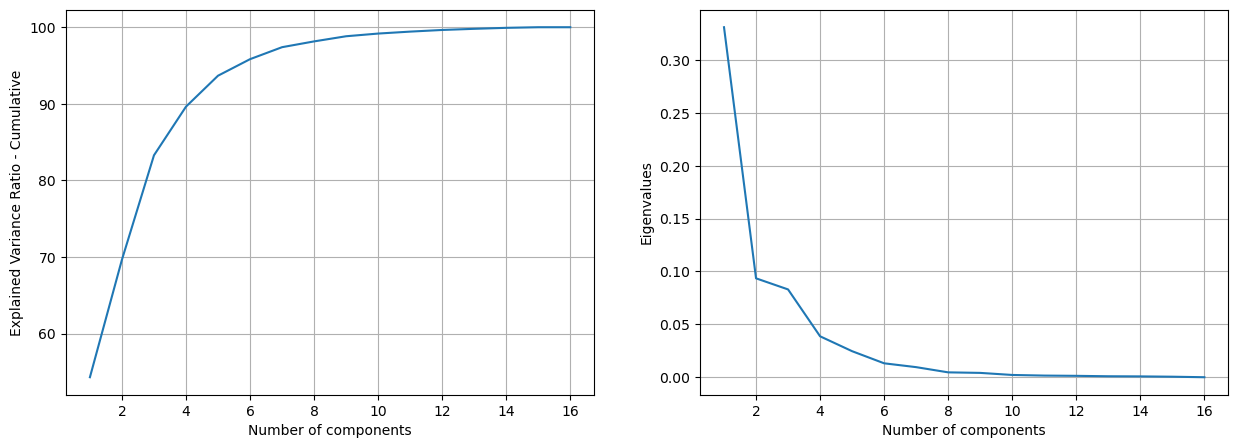

In [840]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid(True)
plt.plot(range(1, len_components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained Variance Ratio - Cumulative")

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(range(1, len_components + 1), pca.explained_variance_)
plt.xlabel("Number of components")
plt.ylabel("Eigenvalues")

plt.show()

insight:
- untuk mempertahankan informasi sekitar 95% dibutuhkan 6 komponen utama, ini berarti jika dimensi direduksi menjadi 6 komponen yang asalnya 16, itu bisa menjelaskan setidaknya sekitar 95% informasi
- komponen pertama dan kedua memiliki eigenvalues yang jauh lebih besar dibandingkan komponen lainnya, menunjukkan bahwa komponen pertama dan kedua menjelaskan sebagian besar variansi dalam data

In [841]:
# Check n_features untuk 95% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_features = np.argmax(cumsum >= 0.95) + 1
n_features

6

In [842]:
# train model 95% (6 components) of the original dataset information
pca = PCA(n_components=n_features)
pca.fit(df_model_scaled)

df_model_scaled_pca = pca.transform(df_model_scaled)

# 7. Model Definition

Model akan menggunakan K-means dengan cluster optimal berdasarkan hasil penelusuran dari Elbow Method dan Silhouette Plot

## 7.1. Elbow Method

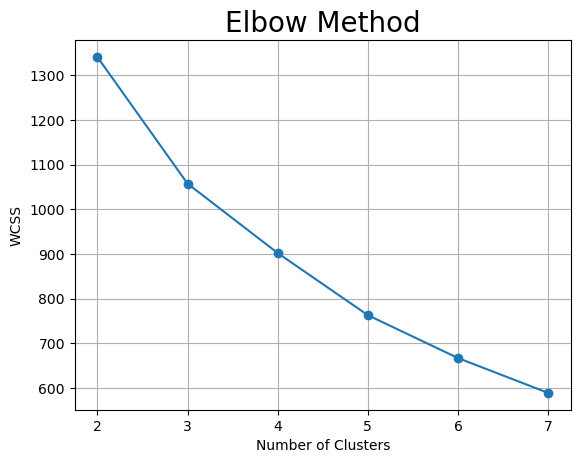

In [843]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 13
max_cluster = 7
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = "k-means++",
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_model_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid(True)
plt.title("Elbow Method", fontsize = 20)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

insight:
- bisa terlihat bahwa pada cluster 3 memiliki bentuk sudut yang relatif lebih kecil (lebih menyiku) dibandingkan dengan cluster yang lain
- kemungkinan pembagian menjadi 3 cluster bisa memberikan keseimbangan cluster yang baik

## 7.2. Silhouette Plot

In [844]:
# Function to create Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.4336755997917753
For n_clusters = 3 The average silhouette_score is : 0.4243079014647616
For n_clusters = 4 The average silhouette_score is : 0.4235163209159865
For n_clusters = 5 The average silhouette_score is : 0.36624877883804735
For n_clusters = 6 The average silhouette_score is : 0.35714988498608324


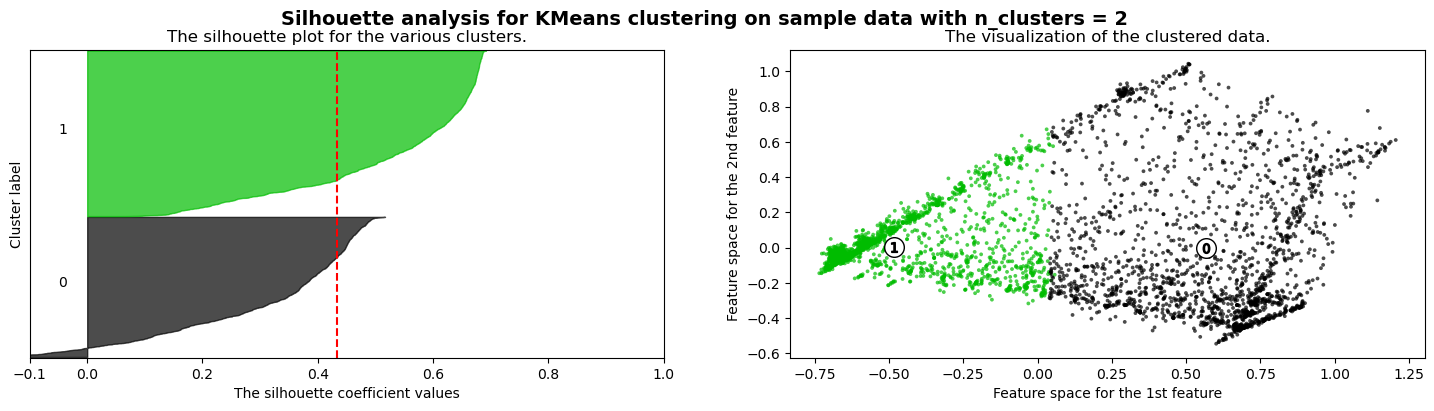

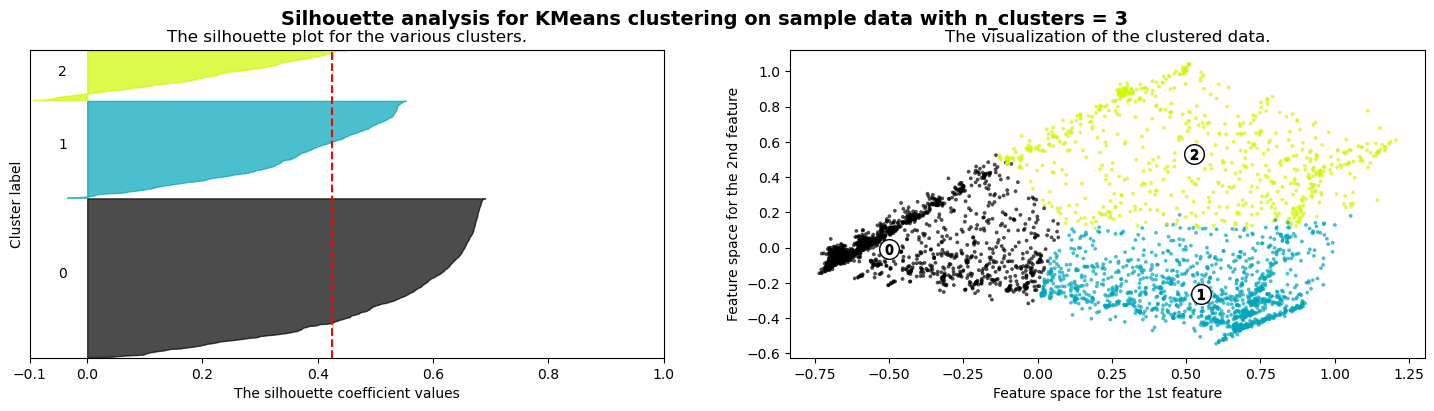

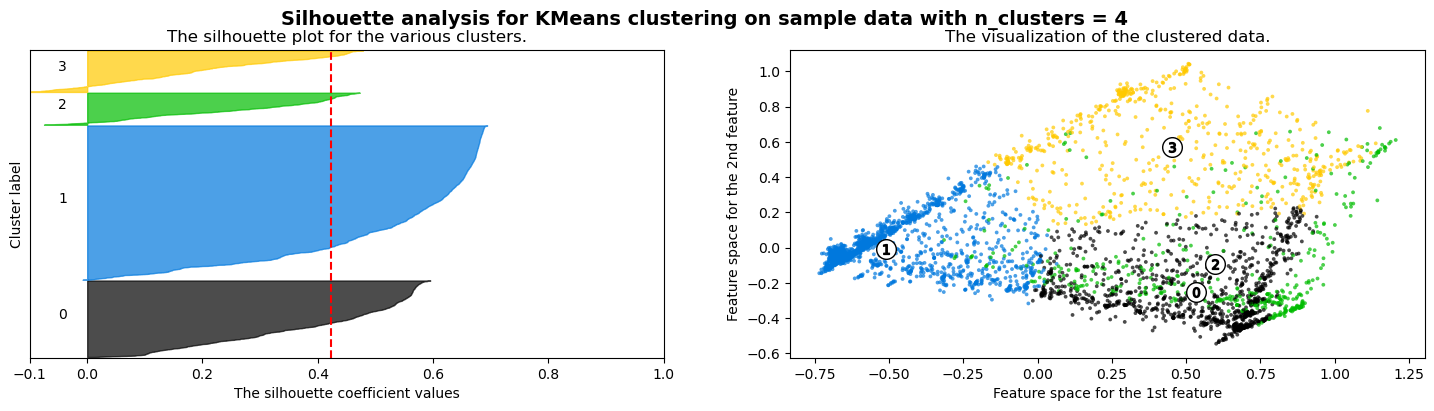

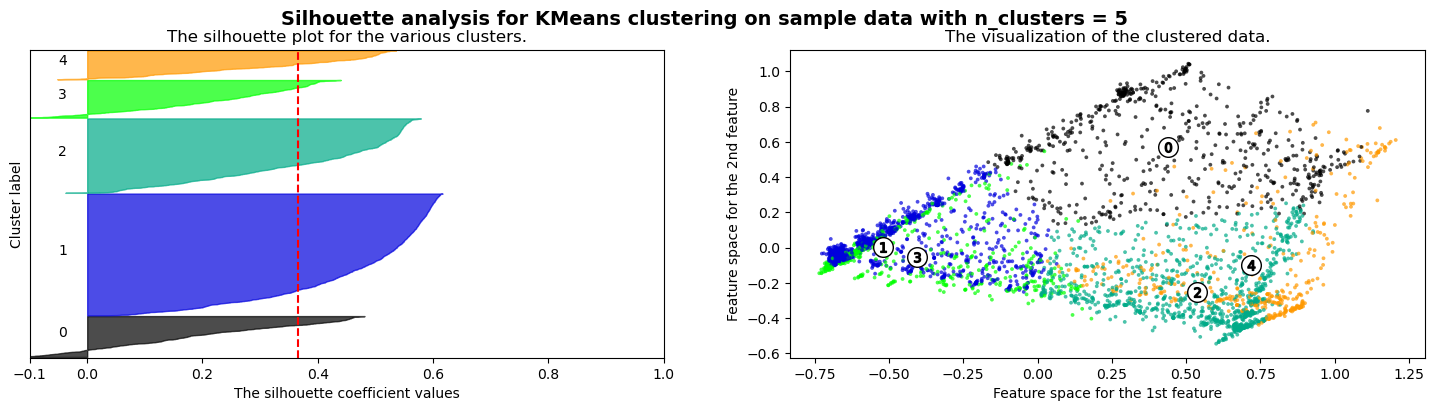

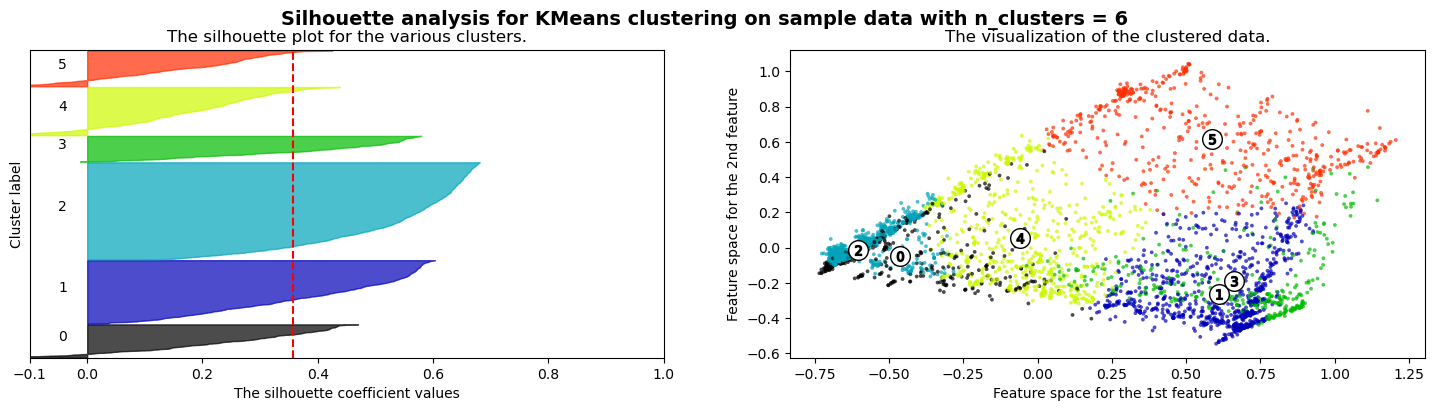

In [845]:
# call plot_silhouette func
plot_silhouette(range(2, max_cluster), df_model_scaled_pca, random_state)

insight:
- 2 cluster, bisa terlihat pembagian menjadi 2 cluster terlihat lumayan berimbang dan sebarannya pun bisa dibagi dengan garis yang jelas
- 3 cluster, pembagian 3 cluster juga terlihat cukup berimbang dan sebarannya pun bisa dibagi berdasarkan garis yang jelas
- 4 hingga 6 cluster, pembagian menjadi 4 cluster pun terlihat berimbang namun secara sebaran ada 2 cluster yang timpang tindih menjadi sukar dibagi dengan garis, begitu juga untuk pembagian 5 dan 6, secara sebaran banyak cluster yang saling tumpang tindih sehingga sukar dibagi dengan garis
- berdasarkan pengamatan dari silhouette plot, cluster yang optimal adalah 3 cluster, dengan silhouette_score yang cukup tinggi

## 7.3. Init K-means with Optimal Cluster

Berdasarkan hasil penelusuran Elbow Method dan Silhouette Plot ditemukan bahwa pembagian menjadi 3 cluster adalah pembagian yang optimal bagi dataset

In [846]:
# init model kmeans
km = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = random_state)

# 8. Model Clustering

In [847]:
# fit optimal number of clusters (3)
km = km.fit(df_model_scaled_pca)

# predict cluster
pred = km.predict(df_model_scaled_pca)
pred

array([0, 2, 1, ..., 0, 2, 1], dtype=int32)

In [848]:
# insert clustering result into original dataset
df_model_final = df_model.copy()
df_model_final["cluster"] = pred
df_model_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,1854.033230,1.000000,1013.50,576.00,437.50,1243.093189,0.500000,0.083333,0.333333,0.083333,5,15,2000.0,654.473825,1524.375697,0.000000,0
1,129.836526,0.909091,1433.99,743.99,690.00,0.000000,0.909091,0.454545,0.636364,0.000000,0,19,4000.0,1363.134203,141.648860,0.875000,2
2,21.580264,0.909091,284.72,0.00,284.72,0.000000,0.666667,0.000000,0.666667,0.000000,0,16,5000.0,344.161416,155.792859,0.800000,1
3,16.379412,0.454545,178.15,0.00,178.15,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,229.376368,89.613822,0.181818,0
4,686.657879,1.000000,2476.45,1624.50,851.95,253.273353,1.000000,0.750000,1.000000,0.083333,1,35,4000.0,1600.734366,224.265608,0.083333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,10571.411070,1.000000,7739.48,0.00,7739.48,0.000000,1.000000,0.000000,1.000000,0.000000,0,44,8000.0,2688.447014,76406.207520,0.000000,1
4471,2584.317807,1.000000,0.00,0.00,0.00,6036.492283,0.000000,0.000000,0.000000,0.250000,7,0,3000.0,6024.595066,826.013735,0.181818,0
4472,655.712971,1.000000,264.35,202.80,61.55,0.000000,0.333333,0.083333,0.166667,0.000000,0,6,1500.0,180.129661,295.417192,0.000000,0
4473,6593.820644,1.000000,388.66,388.66,0.00,4621.934580,0.583333,0.583333,0.000000,0.416667,7,7,7000.0,1624.583114,2503.402340,0.000000,2


# 9. Exploratory Data Analysis (EDA) after Clustering

<Axes: >

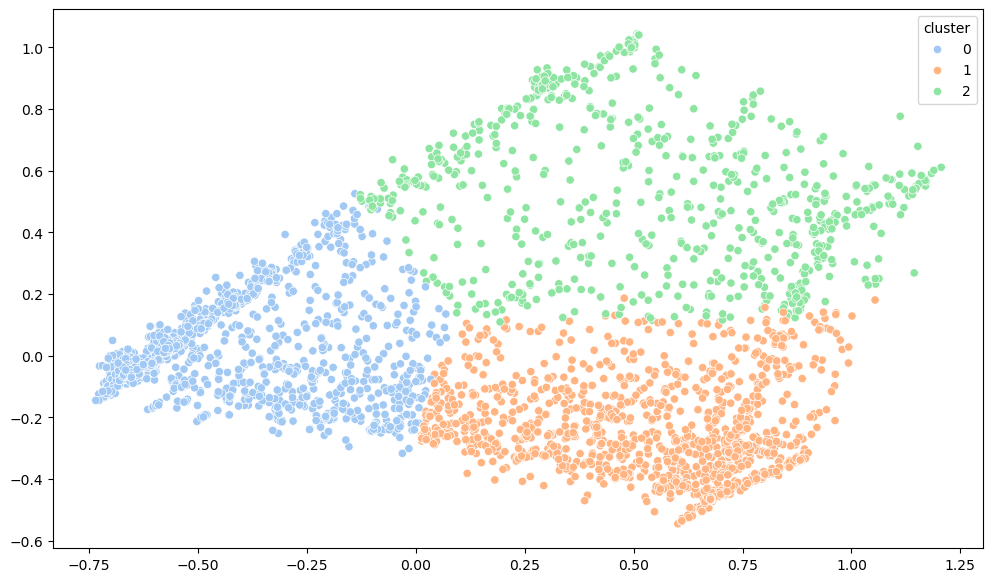

In [849]:
# cluster visualization in 2D
plt.figure(figsize=(12,7))
sns.scatterplot(x=df_model_scaled_pca[:,0], y=df_model_scaled_pca[:,1], hue=df_model_final["cluster"], palette="pastel")

insight:

Distribusi data dalam plot ini menunjukkan bahwa masing-masing cluster menunjukan karakteristik yang cukup jelas dan terpisah, artinya clustering menggunakan K-means berhasil mengelompokkan pelanggan berdasarkan pola penggunaan kartu kredit.

1. Cluster 0 (blue)

Terdistribusi di bagian kiri bawah plot, menampilkan pola horizontal memanjang. Ini menunjukkan bahwa anggota dalam cluster ini memiliki karakteristik yang mirip dalam variabel yang diwakili oleh sumbu X dan Y.

2. Cluster 1 (orange)

Berada di bagian bawah plot, memanjang secara horizontal dengan distribusi yang lebih padat. Cluster ini menunjukkan konsentrasi data yang tinggi dalam rentang nilai tertentu.

3. Cluster 2 (green)

Terletak di bagian atas plot, menampilkan distribusi yang lebih vertikal. Ini menunjukkan bahwa anggota cluster ini memiliki karakteristik yang berbeda dibandingkan dengan dua cluster lainnya.

## 9.1. Cluster 0

In [850]:
# describe cluster 0
cluster_0 = df_model_final[df_model_final["cluster"] == 0]
cluster_0.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,2247.0,1759.218515,2037.325310,0.000000,268.341118,1113.396708,2347.434555,14581.459140
BALANCE_FREQUENCY,2247.0,0.849909,0.247526,0.000000,0.750000,1.000000,1.000000,1.000000
PURCHASES,2247.0,281.283672,730.196017,0.000000,0.000000,54.670000,307.640000,17945.000000
ONEOFF_PURCHASES,2247.0,219.193934,651.989738,0.000000,0.000000,0.000000,197.000000,17945.000000
INSTALLMENTS_PURCHASES,2247.0,62.144798,312.417946,0.000000,0.000000,0.000000,0.000000,12541.000000
CASH_ADVANCE,2247.0,1373.677038,2343.323863,0.000000,0.000000,411.828101,1887.905077,47137.211760
PURCHASES_FREQUENCY,2247.0,0.142112,0.169528,0.000000,0.000000,0.083333,0.250000,0.666667
ONEOFF_PURCHASES_FREQUENCY,2247.0,0.080697,0.122720,0.000000,0.000000,0.000000,0.100000,0.583333
PURCHASES_INSTALLMENTS_FREQUENCY,2247.0,0.060718,0.120506,0.000000,0.000000,0.000000,0.000000,0.500000
CASH_ADVANCE_FREQUENCY,2247.0,0.190878,0.216350,0.000000,0.000000,0.100000,0.333333,1.500000


insgiht:
- BALANCE: Saldo rata-rata cukup tinggi (1759.22) dengan variasi yang cukup besar (std 2037.33).
- BALANCE_FREQUENCY: Frekuensi 0.85, menunjukkan bahwa sering terjadi pembaharuan pada saldo.
- PURCHASES: Pembelian rata-rata rendah (281.28) dengan sebagian besar pembelian adalah pembelian satu kali (ONEOFF_PURCHASES 219.19).
- CASH_ADVANCE: Penggunaan cash advance cukup tinggi (1373.68).
- PURCHASES_FREQUENCY: Frekuensi pembelian sangat rendah (0.142).
- CREDIT_LIMIT: Batas kredit rata-rata sedang (4183.50).
- PRC_FULL_PAYMENT: Persentase pembayaran penuh sangat rendah (0.064).

bisa disimpulkan bahwa cluster 0:
- Saldo Tinggi, Pembelian Rendah: Pengguna di cluster ini memiliki saldo tinggi tetapi frekuensi pembelian rendah. Cenderung menyimpan uang di akun daripada menggunakannya untuk transaksi pembelian.
- Penggunaan Uang Muka Tunai: Pengguna ini sering menggunakan fitur uang muka tunai, menunjukkan kemungkinan kebutuhan likuiditas jangka pendek.
- Frekuensi Pembaruan Saldo Tinggi: Meskipun tidak sering membeli, pengguna sering memperbarui saldo, mungkin melalui setoran rutin atau transaksi lainnya.

## 9.2. Cluster 1

In [851]:
# describe cluster 1
cluster_1 = df_model_final[df_model_final["cluster"] == 1]
cluster_1.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1370.0,1205.614606,1939.611775,0.000000,65.894163,378.804765,1436.513676,16115.596400
BALANCE_FREQUENCY,1370.0,0.928080,0.159734,0.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,1370.0,1147.379109,1450.521952,58.320000,344.242500,653.605000,1367.482500,15108.470000
ONEOFF_PURCHASES,1370.0,304.915095,653.491264,0.000000,0.000000,0.000000,302.670000,6345.650000
INSTALLMENTS_PURCHASES,1370.0,843.120949,1089.232502,25.920000,281.535000,508.510000,1003.225000,14686.100000
CASH_ADVANCE,1370.0,539.901116,1453.860401,0.000000,0.000000,0.000000,180.747960,16323.642430
PURCHASES_FREQUENCY,1370.0,0.873989,0.158654,0.416667,0.750000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,1370.0,0.106252,0.154111,0.000000,0.000000,0.000000,0.166667,0.666667
PURCHASES_INSTALLMENTS_FREQUENCY,1370.0,0.822508,0.186490,0.333333,0.666667,0.888889,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,1370.0,0.075642,0.159499,0.000000,0.000000,0.000000,0.083333,1.000000


insight:
- BALANCE: Saldo rata-rata lebih rendah (1205.61) dibanding Cluster 0, dengan variasi yang besar (std 1939.61).
- BALANCE_FREQUENCY: Frekuensi sangat tinggi (0.928).
- PURCHASES: Pembelian rata-rata lebih tinggi (1147.38).
- CASH_ADVANCE: Penggunaan cash advance lebih rendah dari Cluster 0 (539.90).
- PURCHASES_FREQUENCY: Frekuensi pembelian sangat tinggi (0.874).
- CREDIT_LIMIT: Batas kredit rata-rata sedang (4066.12).
- PRC_FULL_PAYMENT: Persentase pembayaran penuh lebih tinggi dibandingkan dengan Cluster 0 (0.241).

bisa disimpulkan bahwa cluster 1:

- Frekuensi Pembelian Tinggi: Pengguna ini sangat aktif dalam melakukan transaksi pembelian. Pengguna lebih sering melakukan pembelian cicilan dari pada pembelian satu kali.
- Penggunaan Pembayaran: Ada indikasi bahwa pengguna dalam cluster ini mungkin lebih cenderung melakukan pembayaran cicilan.
- Saldo Tinggi: Pengguna juga memiliki saldo tinggi dengan batas kredit yang lebih tinggi, memungkinkan untuk melakukan lebih banyak transaksi.

## 9.3. Cluster 2

In [852]:
# describe cluster 2
cluster_2 = df_model_final[df_model_final["cluster"] == 2]
cluster_2.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,703.0,1874.008438,2375.614134,0.413670,259.898074,915.981419,2525.185742,18495.55855
BALANCE_FREQUENCY,703.0,0.973642,0.085490,0.181818,1.000000,1.000000,1.000000,1.00000
PURCHASES,703.0,3167.297752,3830.636085,8.400000,1067.060000,2099.890000,3879.180000,41050.40000
ONEOFF_PURCHASES,703.0,2447.711465,3330.462028,8.400000,803.310000,1526.420000,2875.620000,40624.06000
INSTALLMENTS_PURCHASES,703.0,719.586287,1197.978443,0.000000,0.000000,319.010000,921.285000,12128.94000
CASH_ADVANCE,703.0,710.632242,2017.272729,0.000000,0.000000,0.000000,365.096806,27296.48576
PURCHASES_FREQUENCY,703.0,0.892504,0.145360,0.500000,0.833333,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,703.0,0.803167,0.188957,0.333333,0.666667,0.833333,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,703.0,0.463421,0.381898,0.000000,0.000000,0.416667,0.833333,1.00000
CASH_ADVANCE_FREQUENCY,703.0,0.096477,0.190002,0.000000,0.000000,0.000000,0.083333,1.00000


insight:
- BALANCE: Saldo rata-rata paling tinggi (1874.01) dengan variasi yang sangat besar (std 2375.61).
- BALANCE_FREQUENCY: Frekuensi saldo sangat tinggi (0.974).
- PURCHASES: Pembelian rata-rata paling tinggi (3167.30) dengan mayoritas adalah pembelian satu kali (ONEOFF_PURCHASES 2447.71).
- CASH_ADVANCE: Penggunaan cash advance sedang (710.63).
- PURCHASES_FREQUENCY: Frekuensi pembelian sangat tinggi (0.893).
- CREDIT_LIMIT: Batas kredit rata-rata tinggi (6478.56).
- PRC_FULL_PAYMENT: Persentase pembayaran penuh cukup tinggi (0.282).

bisa disimpulkan bahwa cluster 2:

- Frekuensi Pembelian One-Off: Pengguna di cluster ini cenderung melakukan lebih banyak pembelian satu kali daripada pembelian cicilan
- Saldo Tinggi: Saldo akun lebih tinggi dibandingkan dengan cluster lainnya.

## 9.4. Cluster Comparison

<Figure size 2000x1500 with 0 Axes>

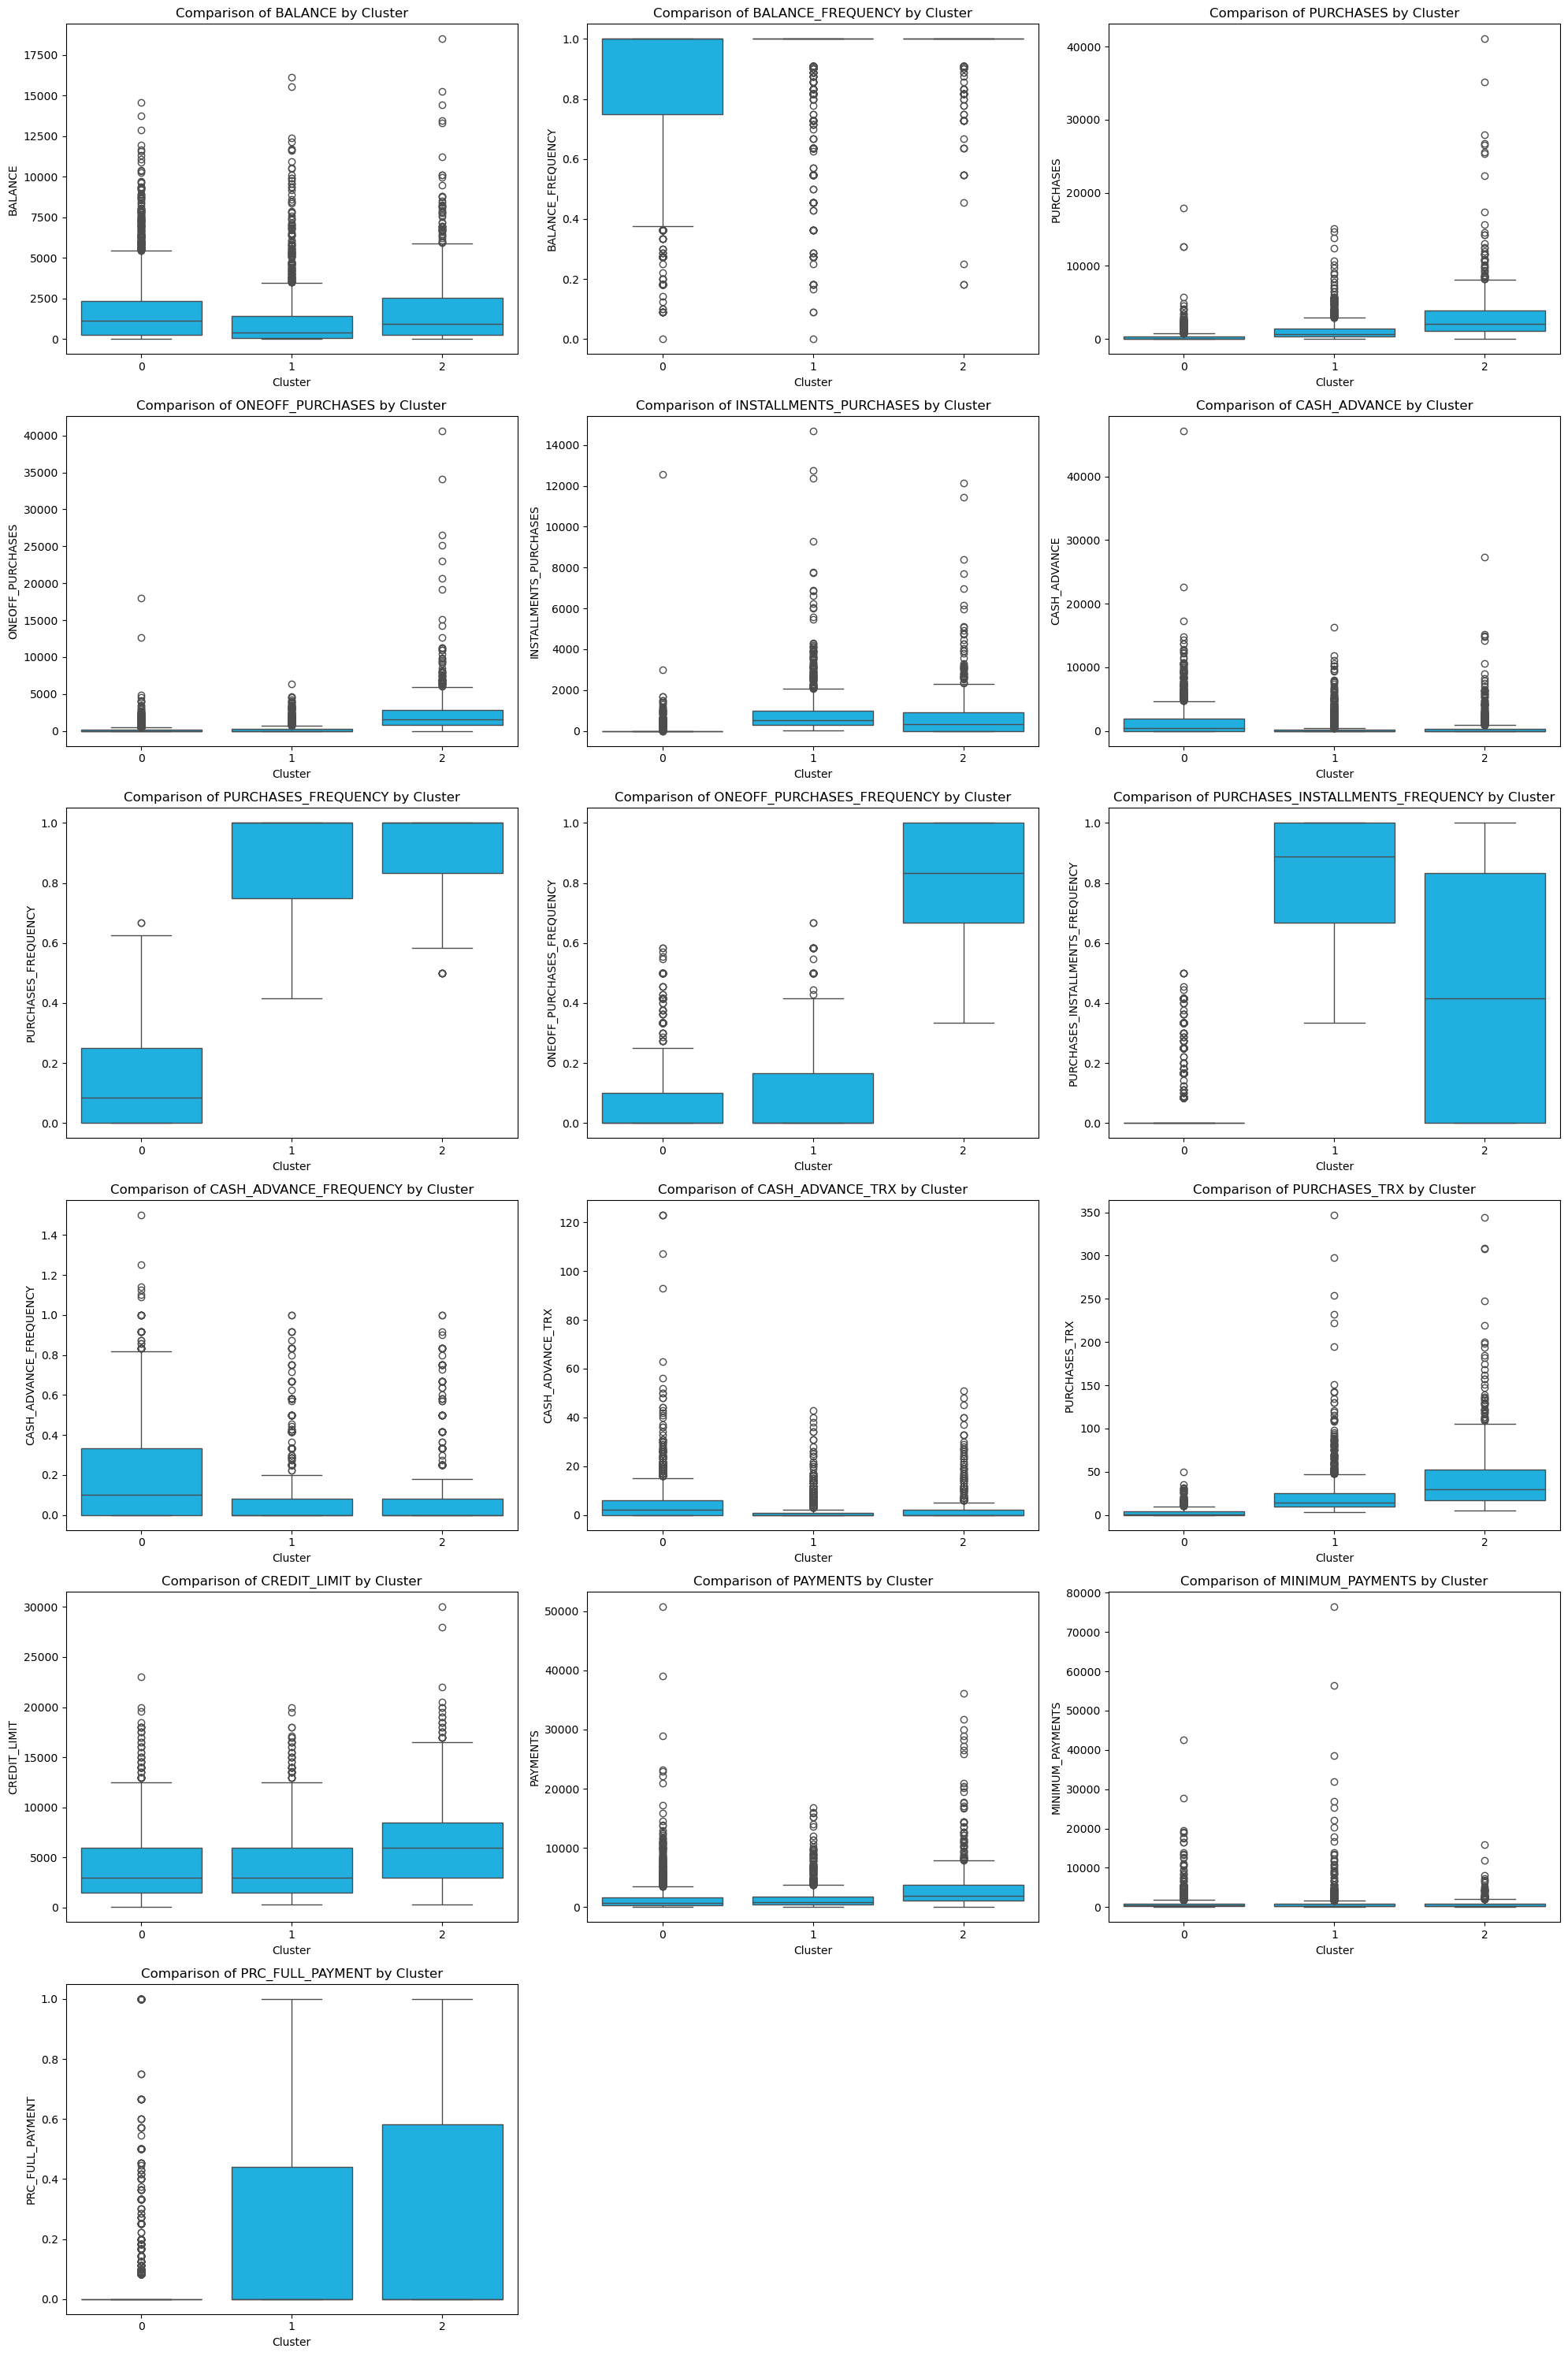

In [853]:
# plot figure
plt.figure(figsize=(20, 15))

# col list exclude cluster
columns = df_model_final.columns[:-1]

# plot len
num_columns = len(columns)

# n rows and cols subplots
num_rows = (num_columns // 3) + 1
num_cols = 3

# subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# loop plot
for i, column in enumerate(columns):
    sns.boxplot(data=df_model_final, x="cluster", y=column, ax=axes[i], color="deepskyblue")
    axes[i].set_title(f"Comparison of {column} by Cluster")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(column)

# remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# show plot
plt.tight_layout()
plt.show()


insight:
1. BALANCE:
- Cluster 1 memiliki median balance yang lebih tinggi dibandingkan cluster 0 dan 2, dengan rentang distribusi yang cukup lebar.
- Cluster 0 memiliki balance yang relatif rendah dengan sedikit outlier yang signifikan.

2. BALANCE_FREQUENCY:
- Cluster 0 dan 2 memiliki balance frequency yang tinggi, sementara cluster 1 memiliki balance frequency yang lebih bervariasi dengan banyak outlier.

3. PURCHASES:
- Cluster 2 memiliki median purchases yang paling tinggi, dengan rentang distribusi yang luas dan banyak outlier.
- Cluster 0 memiliki purchases yang paling rendah dibandingkan dengan cluster lainnya.

4. ONEOFF_PURCHASES:
- Cluster 2 memiliki one-off purchases yang lebih tinggi dibandingkan cluster lainnya.
- Cluster 0 memiliki one-off purchases yang paling rendah.

5. INSTALLMENTS_PURCHASES:
- Cluster 2 memiliki median installments purchases yang tinggi, sementara cluster 0 dan 1 memiliki nilai yang lebih rendah.

6. CASH_ADVANCE:
- Cluster 1 memiliki nilai median cash advance yang paling tinggi.
- Cluster 0 dan 2 memiliki nilai cash advance yang lebih rendah dengan distribusi yang sempit.

7. PURCHASES_FREQUENCY:
- Cluster 2 memiliki purchases frequency yang tinggi dengan distribusi yang luas.
- Cluster 0 memiliki purchases frequency yang rendah.

8. ONEOFF_PURCHASES_FREQUENCY:
- Cluster 2 memiliki nilai median one-off purchases frequency yang lebih tinggi dibandingkan cluster lainnya.
- Cluster 0 memiliki nilai yang paling rendah.

9. PURCHASES_INSTALLMENTS_FREQUENCY:
- Cluster 2 memiliki purchases installments frequency yang tinggi.
- Cluster 0 memiliki nilai yang paling rendah.

10. CASH_ADVANCE_FREQUENCY:
- Cluster 1 memiliki nilai median cash advance frequency yang lebih tinggi.
- Cluster 0 dan 2 memiliki nilai yang lebih rendah.

11. CASH_ADVANCE_TRX:
- Cluster 1 memiliki transaksi cash advance yang lebih tinggi.
- Cluster 0 dan 2 memiliki nilai yang lebih rendah.

12. PURCHASES_TRX:
- Cluster 2 memiliki jumlah transaksi pembelian yang lebih tinggi.
- Cluster 0 memiliki jumlah transaksi pembelian yang lebih rendah.

13. CREDIT_LIMIT:
- Cluster 2 memiliki batas kredit yang sedikit lebih tinggi dibandingkan cluster lainnya.
- Distribusi untuk ketiga cluster cukup serupa, dengan beberapa outlier yang signifikan di cluster 1.

14. PAYMENTS:
- Cluster 1 dan 2 memiliki pembayaran yang lebih tinggi dibandingkan cluster 0.
- Cluster 0 memiliki pembayaran yang lebih rendah dengan distribusi yang sempit.

15. MINIMUM_PAYMENTS:
- Cluster 2 memiliki minimum payments yang sedikit lebih tinggi dengan distribusi yang luas.
- Cluster 0 dan 1 memiliki nilai yang lebih rendah dengan distribusi yang sempit.

16. PRC_FULL_PAYMENT:
- Cluster 2 memiliki persentase pembayaran penuh yang lebih tinggi.
- Cluster 0 dan 1 memiliki nilai yang lebih rendah.


## 9.5. EDA after Clustering Consclusion

insight:
- model clustering yang telah dibuat dengan K-means menjadi 3 cluster menunjukan karakteristik yang cukup jelas dan terpisah, artinya clustering menggunakan K-means berhasil mengelompokkan pelanggan berdasarkan pola penggunaan kartu kredit.
- Cluster 0 merupakan kelompok dengan karakteristik pengguna dengan frekuensi pembelian yang relatif rendah
- Cluster 1 merupakan kelompok dengan karakteristik pengguna yang frekuensi pembeliannya relatif tinggi dengan proporsi antara pembelian cicilan dan pembelian satu kali relatif berimbang
- Cluster 2 merupakan kelompok dengan karakteristik pengguna yang frekuensi pembeliannya relatif tinggi dan cenderung lebih banyak melakukan  oneoff purchases atau pembelian satu kali

# 10. Model Saving

In [854]:
# rewrite step for pipeline
steps = [
    ("selector", ColumnTransformer([
        ("select", "passthrough", df_model.columns.tolist())
    ])),
    ("scaler", scaler),
    ("pca", pca),
    ("kmeans", km)
]

# create pipeline
pipeline = Pipeline(steps)

# fit df_model
pipeline.fit(df_model)

Pipeline(steps=[('selector',
                 ColumnTransformer(transformers=[('select', 'passthrough',
                                                  ['BALANCE',
                                                   'BALANCE_FREQUENCY',
                                                   'PURCHASES',
                                                   'ONEOFF_PURCHASES',
                                                   'INSTALLMENTS_PURCHASES',
                                                   'CASH_ADVANCE',
                                                   'PURCHASES_FREQUENCY',
                                                   'ONEOFF_PURCHASES_FREQUENCY',
                                                   'PURCHASES_INSTALLMENTS_FREQUENCY',
                                                   'CASH_ADVANCE_FREQUENCY',
                                                   'CASH_ADVANCE_TRX',
                                                   'PURCHASES_TRX',
                                                   'CREDIT_LIMIT', 'PAYMENTS',
                                                   'MINIMUM_PAYMENTS',
                                                   'PRC_FULL_PAYMENT'])])),
                ('scaler', MinMaxScaler()), ('pca', PCA(n_components=6)),
                ('kmeans', KMeans(n_clusters=3, n_init=10, random_state=13))])

In [855]:
# dump pipeline to model.pkl
joblib.dump(pipeline, "model.pkl")

['model.pkl']

# 11. Model Inference

In [856]:
# load model.pkl
model = joblib.load("model.pkl")

# data baru
new_data = pd.DataFrame([{
    'BALANCE': 50.853021,
    'BALANCE_FREQUENCY': 1.0,
    'PURCHASES': 428.75,
    'ONEOFF_PURCHASES': 0.0,
    'INSTALLMENTS_PURCHASES': 428.75,
    'CASH_ADVANCE': 0.0,
    'PURCHASES_FREQUENCY': 1.0,
    'ONEOFF_PURCHASES_FREQUENCY': 0.0,
    'PURCHASES_INSTALLMENTS_FREQUENCY': 1.0,
    'CASH_ADVANCE_FREQUENCY': 0.0,
    'CASH_ADVANCE_TRX': 0.0,
    'PURCHASES_TRX': 18.0,
    'CREDIT_LIMIT': 8000.0,
    'PAYMENTS': 319.919021,
    'MINIMUM_PAYMENTS': 107.187821,
    'PRC_FULL_PAYMENT': 0.090909
},{
    'CUST_ID': 123,
    'BALANCE': 6593.820644,
    'BALANCE_FREQUENCY': 1.0,
    'PURCHASES': 388.66,
    'ONEOFF_PURCHASES': 388.66,
    'INSTALLMENTS_PURCHASES': 0.0,
    'CASH_ADVANCE': 4621.93458,
    'PURCHASES_FREQUENCY': 0.583333,
    'ONEOFF_PURCHASES_FREQUENCY': 0.583333,
    'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
    'CASH_ADVANCE_FREQUENCY': 0.416667,
    'CASH_ADVANCE_TRX': 7.0,
    'PURCHASES_TRX': 7.0,
    'CREDIT_LIMIT': 7000.0,
    'PAYMENTS': 1624.583114,
    'MINIMUM_PAYMENTS': 2503.40234,
    'PRC_FULL_PAYMENT': 0.0
}])

# inference data baru
clustering = model.predict(new_data)

# hasil clustering
print("Hasil Clustering: ", clustering)
new_data["cluster"] = clustering
new_data.T

Hasil Clustering:  [1 2]


,0,1
BALANCE,50.853021,6593.820644
BALANCE_FREQUENCY,1.000000,1.000000
PURCHASES,428.750000,388.660000
ONEOFF_PURCHASES,0.000000,388.660000
INSTALLMENTS_PURCHASES,428.750000,0.000000
CASH_ADVANCE,0.000000,4621.934580
PURCHASES_FREQUENCY,1.000000,0.583333
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.583333
PURCHASES_INSTALLMENTS_FREQUENCY,1.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.416667


# 12. Conceptual Problems

## 12.1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Inertia pada algoritma K-Means adalah metrik yang mengukur seberapa baik data dikelompokkan oleh algoritma. Inertia dikenal juga sebagai "within-cluster sum of squares" (WCSS) atau jumlah total jarak kuadrat antara setiap titik data dan pusat cluster terdekatnya. Inertia digunakan untuk mengevaluasi seberapa kompak cluster yang dihasilkan oleh algoritma K-Means.

- Inertia Rendah: Menunjukkan bahwa titik data dalam cluster sangat dekat satu sama lain dan dengan pusat cluster, yang berarti cluster tersebut kompak dan baik.
- Inertia Tinggi: Menunjukkan bahwa titik data dalam cluster tersebar lebih jauh dari pusat cluster, yang berarti cluster tersebut kurang kompak dan mungkin kurang baik.

## 12.2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan)!

Elbow Method adalah teknik yang digunakan untuk menentukan jumlah cluster yang optimal dalam algoritma K-Means. Metode ini melibatkan plotting nilai inertia (atau within-cluster sum of squares) terhadap jumlah cluster dan mencari titik "elbow" di mana penurunan nilai inertia mulai melambat. Titik elbow ini dianggap sebagai jumlah cluster yang optimal.

Penggunaan:

- Untuk menentukan jumlah cluster yang optimal tanpa memerlukan asumsi awal tentang jumlah cluster.
- Untuk menghindari overfitting atau underfitting dalam pembentukan cluster.

Cara Penggunaan:

1. Jalankan algoritma K-Means untuk berbagai nilai `k` (jumlah cluster), misalnya dari 1 hingga 10.
2. Hitung dan plot nilai inertia untuk setiap `k`.
3. Identifikasi titik di mana penurunan nilai inertia mulai melambat, membentuk titik "elbow".

Kelebihan:

- Sederhana dan intuitif.
- Membantu dalam menentukan jumlah cluster yang tidak diketahui sebelumnya.

Kelemahan:

- Tidak selalu ada titik elbow yang jelas dalam plot inertia.
- Subjektif dalam menentukan titik elbow, bisa berbeda-beda tergantung interpretasi.
- Kurang efektif jika distribusi data tidak membentuk cluster yang jelas atau jika data memiliki struktur yang kompleks.

# 13. Conclusion

Clustering menggunakan K-means dengan jumlah cluster 3 menghasilkan pembagian kelompok yang terbilang baik dimana kelompok terbagi menjadi Cluster 0, Cluster 1 dan Cluster 2 dengan masing-masing karakteristiknya.

Berdasarkan hasil penelusuran data setelah clustering ditemukan bahwa:

1. Cluster 0: <b>Pengguna dengan Saldo Tinggi dan Frekuensi Pembelian Rendah</b>
- Karakteristik: Cluster 0 terdiri dari pengguna dengan saldo akun yang relatif tinggi dan variasi yang besar dalam pembelian dan penggunaan uang muka tunai, tetapi dengan frekuensi pembelian yang relatif rendah.

2. Cluster 1: <b>Pengguna Aktif dengan Frekuensi Pembelian Tinggi dengan Porsi Seimbang antara Cicilan dan Pembelian Satu Kali</b>
- Karakteristik: Cluster 1 terdiri dari pengguna dengan saldo sedang, frekuensi pembelian yang tinggi, dan distribusi pembelian antara satu kali dan cicilan yang seimbang. Memiliki persentase pembayaran penuh yang cukup tinggi, menunjukkan manajemen keuangan yang lebih baik.

3. Cluster 2: <b>Pengguna Aktif dengan Frekuensi Pembelian Tinggi dengan Porsi Lebih Tinggi pada Pembelian Satu Kali</b>
- Karakteristik: Cluster 2 terdiri dari pengguna dengan saldo tertinggi, pembelian tertinggi, dan frekuensi pembelian yang sangat tinggi. Cenderung melakukan pembelian satu kali dalam jumlah besar dan memiliki batas kredit yang tinggi.

Berdasarkan karakteristik masing-masing cluster, berikut beberapa rekomendasi untuk strategi pemasaran dan pengelolaan pelanggan:

1. Cluster 0.
- <u>Strategi Peningkatan Transaksi</u>: Berikan insentif seperti cashback atau diskon untuk meningkatkan frekuensi pembelian.
- <u>Promosi Produk Premium</u>: Karena memiliki saldo tinggi, bisa ditawarkan produk dan layanan premium yang sesuai dengan kemampuan finansial.
- <u>Penawaran Cicilan</u>: Penawaran produk dengan skema cicilan yang sesuai dengan kemampuan finansial pengguna.

2. Cluster 1.
- <u>Penawaran Eksklusif</u>: Berikan penawaran eksklusif dan promosi khusus untuk mempertahankan dan meningkatkan loyalitas pelanggan ini.
- <u>Peningkatan Batas Kredit</u>: Pertimbangkan untuk meningkatkan batas kredit bagi pengguna dengan riwayat pembayaran yang baik untuk mendorong lebih banyak transaksi.
- <u>Personalized Marketing</u>: Gunakan data transaksi untuk membuat kampanye pemasaran yang dipersonalisasi sesuai dengan preferensi.

3. Cluster 2.
- <u>Strategi Peningkatan Transaksi</u>: Berikan insentif seperti cashback atau diskon untuk lebih meningkatkan frekuensi pembelian.
- <u>Penawaran Produk Eksklusif One-Off Purchase</u>: Fokus pada penawaran produk eksklusif untuk memanfaatkan pembelian satu kali yang besar.
- <u>Program Loyalitas</u>: Implementasikan program loyalitas untuk meningkatkan keterlibatan dan frekuensi penggunaan kartu.

Untuk analisis lebih lanjut dari hasil model clustering ini, bisa dilakukan churn analysis dari setiap clusternya untuk memprediksi cluster mana yang memiliki resiko churn yang tinggi. Dari hasil churn analysis tersebut nantinya bisa memberikan rekomendasi strategi retensi untuk mengurangi churn di cluster dengan risiko churn tinggi.